In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# About the data for Projects
the dataset contain the data of the customer.on the basis of the data we have to predict the churn rate by the customer.
data set contains the data like.. customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn.

churn rate (sometimes called attiribution rate), in its broadest sense, is a measure of the number of indivisual or items moving out of the collective group over a specific period. it is one of two primary factors that determines the steady-states level of customer a buisness will support. the term is ussed in many contexts. but is the most widely applied in buisness with respect to a contractual customer base, for exameple - in buisnesses with a subscriber-based service model such as mobile telephone networks and pay TV operators.The term is also ussed to refer to participant turnover  in peer-to-peer networks. churn rate is an input into customer lifetime value modeling, and can be part of a simulator used to measure return on marketing investment using marketing mix modeling.



# Importing dataset

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/Datasets/main/Telecom_customer_churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


this data contain the details of customer in which both numerical and categorical data is present. here "churn" is the target variable it will be term as "Classification Problem" where we need predict the several churn using by classification models

In [3]:
# 1st 15 raws of data
df.head(15)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [4]:
# last 15 raw of data
df.tail(15)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7028,9281-CEDRU,Female,0,Yes,No,68,Yes,No,DSL,No,...,No,Yes,Yes,No,Two year,No,Bank transfer (automatic),64.10,4326.25,No
7029,2235-DWLJU,Female,1,No,No,6,No,No phone service,DSL,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,44.40,263.05,No
7030,0871-OPBXW,Female,0,No,No,2,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.05,39.25,No
7031,3605-JISKB,Male,1,Yes,No,55,Yes,Yes,DSL,Yes,...,No,No,No,No,One year,No,Credit card (automatic),60.00,3316.1,No
7032,6894-LFHLY,Male,1,No,No,1,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes
7033,9767-FFLEM,Male,0,No,No,38,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,No
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7035,8456-QDAVC,Male,0,No,No,19,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.1,No
7036,7750-EYXWZ,Female,0,No,No,12,No,No phone service,DSL,No,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,60.65,743.3,No
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No


# Exploratory Data Analysis(EDA)

In [5]:
#CHECKING DIMENTION OF THE DATA SET
df.shape

(7043, 21)

this dataset contain 7043 raw and 21 columns out of which one of target variable remaining 20 are independent variable

In [6]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
# conver all variable into list
df.columns.tolist()

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [8]:
# checking types of columns
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

there are three diffrent types of data(int64,float,and object) are present in the dataset

In [9]:
#checking null values in dataset
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
# more detail of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


this gives brief about the datasetwhich include indexing type,column type,no null values,and memory usage. 
As we can see there is nou null values in this dataset
1. column is float datatype
2. column is int64 data type
18.columns are objective data type


<Axes: >

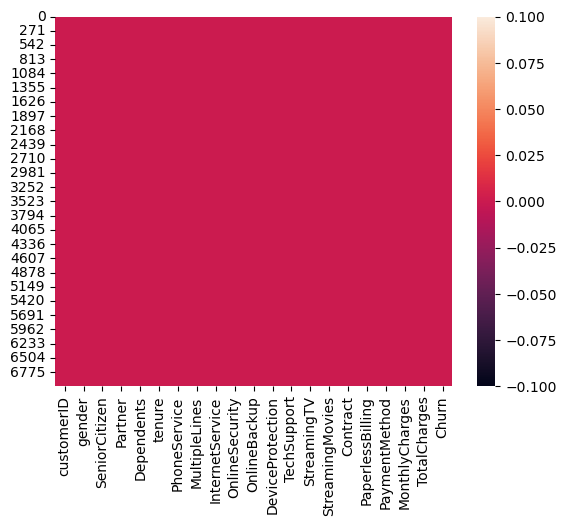

In [11]:
#lest see null values bu using heatmap foe visually
sns.heatmap(df.isnull())

In [12]:
#check unique values
#in info() this columns shown object dtype but if we shaown csv data there are float data type so we check unique values
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [13]:
#here we can see values are present in coats thats why its shown object dtype 
#but here 1 other reason also here may be present white space values if any columns contain white space values in thats case all 
#values convert into object data type srting data type so tjis will check in next step

In [14]:
df['TotalCharges'].nunique()
# so here 6531 are unique values out of 7043 values

6531

In [15]:
#now we will check values count of each columns
for i in df.columns:
    print(df[i].value_counts())
    print("\n")
# value_counts fun() use for give the frequency of each unique clases in a perticular columns 
# here all dtype shown int because here we check valu counts so its give data in frequency thats why it shown dtype int64
# so here shown in TotalCharges Columns 11 values with white spaces so it was the reason it shown dtype object


customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64


gender
Male      3555
Female    3488
Name: count, dtype: int64


SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64


Partner
No     3641
Yes    3402
Name: count, dtype: int64


Dependents
No     4933
Yes    2110
Name: count, dtype: int64


tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64


PhoneService
Yes    6361
No      682
Name: count, dtype: int64


MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64


InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64


OnlineSecurity
No                     3498
Yes                    2019
No inte

#observation
these are the value counts of all columns and we can see black in TotalCharges Columns Lets check out the unique values of that columns

In [16]:
# agian checking the total unique values of total charges columns 
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [17]:
df.shape
#churn_df.shape[0]    it gives total rows 
#churn_df.shape[1] its gives total columns

(7043, 21)

# Observation
we can noticed that Total Charges column has continues data but its reflecling as object dtype and 11 records of this columns has blank data. so lets handle this column. 

In [18]:
# we will check where the space value in TotalCharges column
#checking the space value in Total Charges Column by loc method
df.loc[df['TotalCharges']==" "]


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


# observation
By locating the Total charges we can find in this column has space as values but it was showing 0 missing values in these columns ..lets fill this columns by some values 
--white scpace values does not consider as null values.

In [19]:
# here we can convert space values into the null values
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)
df['TotalCharges'].value_counts()

TotalCharges
20.2      11
19.75      9
20.05      8
19.9       8
19.65      8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: count, Length: 6530, dtype: int64

In [20]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [22]:
#for changing the dtype we use astype method its type castng method
df["TotalCharges"]=df["TotalCharges"].astype(float)
df["TotalCharges"].dtype

dtype('float64')

# observation
Now we can see TotalCharges column has some white space values which replace by null values and after that we convert from object to float .now we will handle the null values


In [23]:
df.info()
#Total charges column dtype now changed
#here shown totalcharges 7032 non null it mean here total values 7043 so here 11 vlues are null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [24]:
df.isnull().sum()
#here 11 null vlues is there

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

as we have filled blank space with nan values in TotalCharges column its showing 11 null values in that column replacing the nan values  using mean method as the datya has continues values.

In [25]:
np.mean(df["TotalCharges"])
#find the mean values of this column

2283.3004408418656

In [26]:
df.iloc[488:500,:]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
489,8372-JUXUI,Male,0,No,Yes,1,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,74.35,Yes
490,3552-CTCYF,Male,0,Yes,Yes,63,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),104.80,6597.25,No
491,6778-YSNIH,Female,0,No,No,2,Yes,No,DSL,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,59.00,114.15,No
492,0388-EOPEX,Female,0,Yes,No,2,Yes,No,Fiber optic,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.40,139.40,Yes
493,5756-OZRIO,Male,1,Yes,No,61,Yes,Yes,DSL,No,...,No,No,No,Yes,One year,No,Bank transfer (automatic),64.05,3902.60,No
494,6579-JPICP,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,20.40,No
495,8205-OTCHB,Male,0,No,No,22,No,No phone service,DSL,No,...,Yes,No,No,Yes,One year,Yes,Bank transfer (automatic),43.75,903.60,Yes
496,4134-BSXLX,Male,0,Yes,No,28,Yes,No,DSL,Yes,...,No,Yes,No,No,Month-to-month,No,Mailed check,60.90,1785.65,No
497,0505-SPOOW,Female,0,Yes,No,70,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.80,1397.65,No


In [27]:
#checking the mean of total charges column
print("The mean value of TotalCharges is :",df["TotalCharges"].mean())

The mean value of TotalCharges is : 2283.3004408418656


In [28]:
#filling null values is Totalcharges with its mean
df["TotalCharges"]=df["TotalCharges"].fillna(df["TotalCharges"].mean())

In [29]:
df.isnull().sum()
#now we can see here all null values has filled with mean value

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<Axes: >

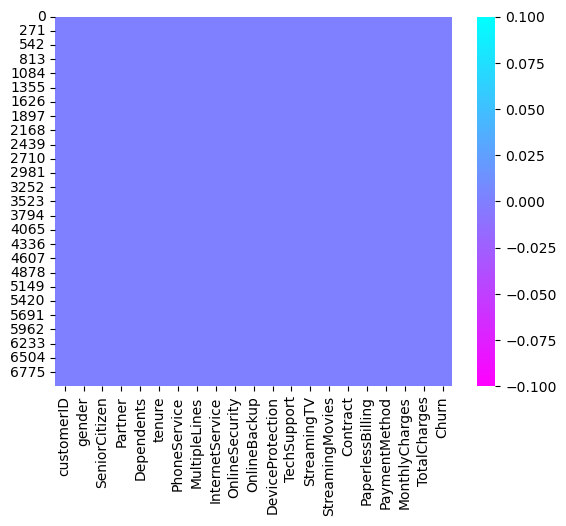

In [30]:
#check by heatmap
sns.heatmap(df.isnull(),cmap="cool_r")


In [31]:
#again check 488 columns
df.iloc[488,:]
#here 488 raw fill with mean values

customerID                         4472-LVYGI
gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                      2283.300441
Churn                                      No
Name: 488, dtype: object

#now we can see there are no any null values

# now we will seprate the numerical column and categorical columns

In [32]:

#separing numerical and categorical columns

#checking for categorical columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]== "object":
        categorical_col.append(i)
print("Categorical columns :",categorical_col)
print("\n")

#checking for Numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i] != "object":
        numerical_col.append(i)
print("Numerical columns :",numerical_col)

Categorical columns : ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


Numerical columns : ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


In [33]:
#checking number of unique values in each columns
df.nunique().to_frame("No of Unique values")
#its conver into dataframe


,No of Unique values
customerID,7043
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3


# obersevation
These are unique values present in dataset .there customer Id clumn has the data of unique ID to the Customer which can we dropped.
Because here unique values in all rows

In [34]:
#dropping customer id columns
df.drop("customerID",axis=1,inplace=True)

In [35]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [36]:
#checking the list of counts of target columns 
df["Churn"].unique()

array(['No', 'Yes'], dtype=object)

# obsr
there are 2 categories are present in the target columns  namely Yes & No


In [37]:
#checking no. unique values in target columns 
df["Churn"].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

# obser
We can assume that No stand for those customer who have not churned and Yes stands for those who have got  churned from the company.


# Description od Dataset

In [38]:
# statistical summary of numerical columns
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


# Observation of statistical summary
This give sthe statistical information of the numerical columns.the summary of the dataset looks perfect since there is no -ve/invalid values present.

From above the description we can observe the following:-

1. The counts of all columns are same which meana there are no missing vlues present in this data set 
2. The mean value is greater than the median(50%) in tenure and TotalCharges Columns ..which means the data is skewed to roght side in these columns
3. The data in column Monthly charges have mean values less than meadian which mean data is skewed to the left side 
4. By summarizing the data we can observe there is a huge difference between 75 pernctile and max hence there are outliers present in this dataset
5. we can also notice the standard deviation min,25 percentile Vlues from this describe method


# Now moving Graphical Analysis

# Data visualization


Univeriate analysis

Churn
No     5174
Yes    1869
Name: count, dtype: int64


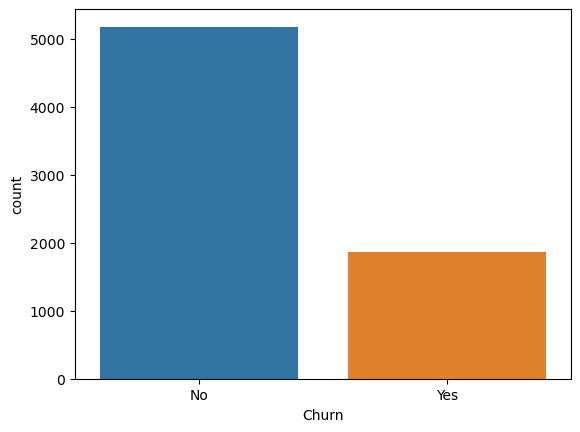

In [39]:
#visualise the number of churn customer
ax=sns.countplot(x='Churn',data=df)
print(df['Churn'].value_counts())

# obsr
we can observe that the count of "No churn" are high  as compared to the count of "Yes churn" 
There are more number of customers who have not churned .this lead to class Implanced issue in the data... we will rectify it bu using Oversampling method in the later part. 

gender
Male      3555
Female    3488
Name: count, dtype: int64


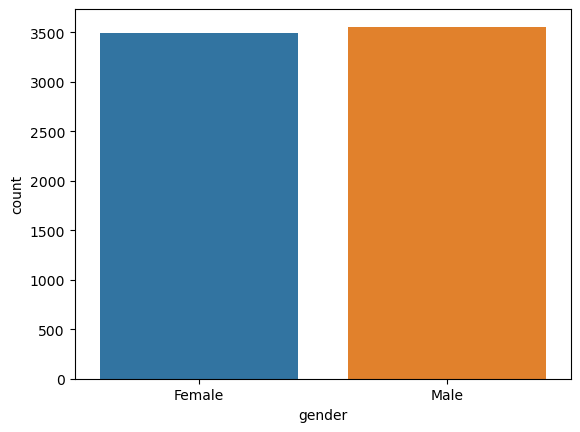

In [40]:
#visualise the count of gender column
print(df['gender'].value_counts())
ax=sns.countplot(x='gender',data=df)
plt.show()

# obsr
From the Plot we can observe thats  the total no. of males & females are almost same


SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64


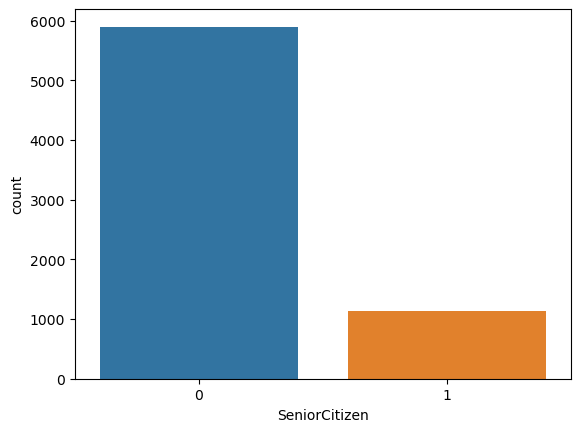

In [41]:
#visualise the count of SeniorCitizen column
print(df['SeniorCitizen'].value_counts())
ax=sns.countplot(x='SeniorCitizen',data=df)
plt.show()

# obsr
Here 0 Represent non senior Citizens & 1 represent senior citizens .
the count of 0 is high as compare to 1 which mean the no. of non senior citizen are quit high compare to the senior citizen data in the dataset

Partner
No     3641
Yes    3402
Name: count, dtype: int64


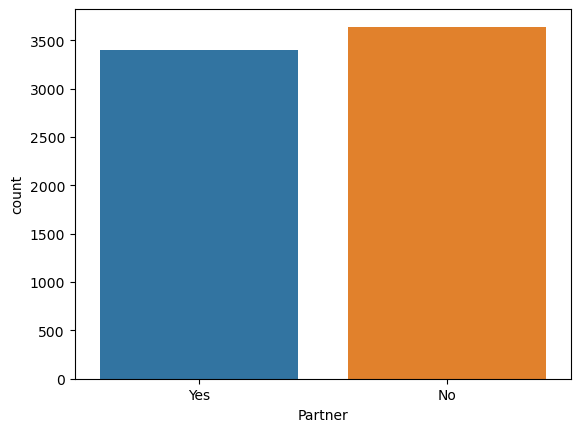

In [42]:
#visualise the count of Partner column
print(df['Partner'].value_counts())
ax=sns.countplot(x='Partner',data=df)
plt.show()

# obsr
Non partner are bit high in count of customer having partner

Dependents
No     4933
Yes    2110
Name: count, dtype: int64


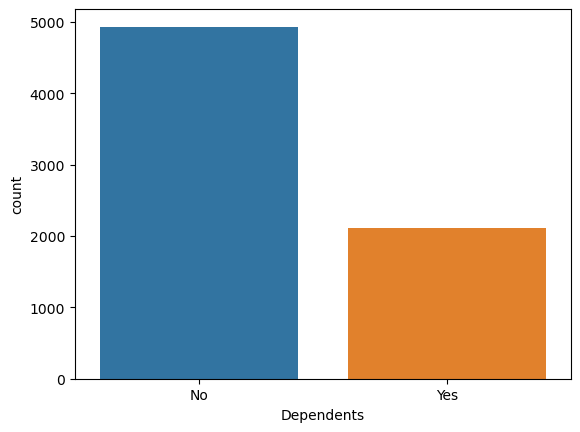

In [43]:
#visualise the count of Dependents column
print(df['Dependents'].value_counts())
ax=sns.countplot(x='Dependents',data=df)
plt.show()

# obers
The customer who have dependents are less compare to non dependents

PhoneService
Yes    6361
No      682
Name: count, dtype: int64


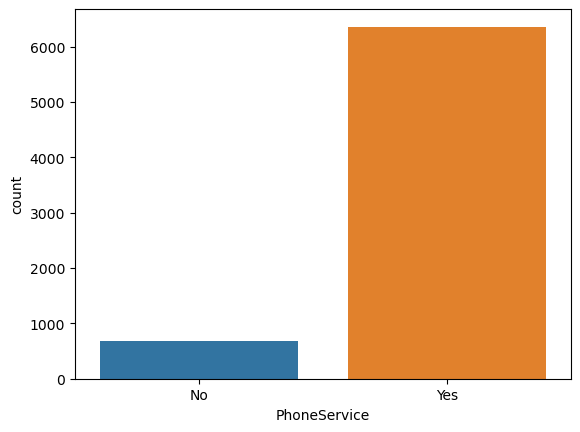

In [44]:
#visualise the count of PhoneService column
print(df['PhoneService'].value_counts())
ax=sns.countplot(x='PhoneService',data=df)
plt.show()

# obrs
The customer who have PhoneService are large in no. and who do not own phone servbices are very less in no.
here huge difference but we cant say hence class implanced because its not target variable 


MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64


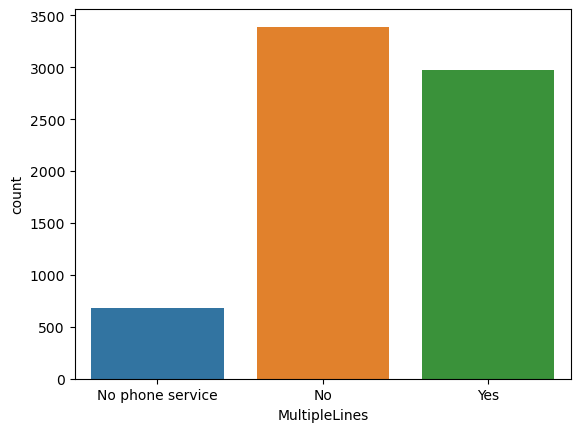

In [45]:
#visualise the count of MultipleLines column
print(df['MultipleLines'].value_counts())
ax=sns.countplot(x='MultipleLines',data=df)
plt.show()

# obsr
The customer having PhoneService from single Line have high counts Compared to the customer having phoneservices From MultipleLines , also the customer who do not have phoneServicess have coverd very les data as compared to the others


OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64


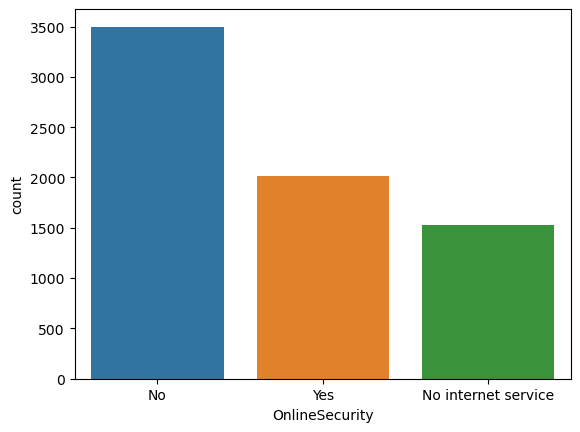

In [46]:
#visualise the count of OnlineSecurity column
print(df['OnlineSecurity'].value_counts())
ax=sns.countplot(x='OnlineSecurity',data=df)
plt.show()

# obsr
The customer Having no internetServices needs Online Security. who do not own any internetService they do no need any online scurity but from the plot we can observe  majority of customer who have interner service have low online security

OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64


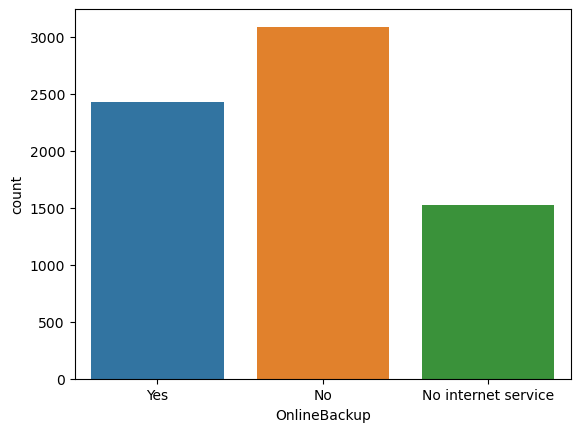

In [47]:
#visualise the count of OnlineBackup column
print(df['OnlineBackup'].value_counts())
ax=sns.countplot(x='OnlineBackup',data=df)
plt.show()

# obsr
we can observe that the customer having no internet service have very less online backup counts comapred to others


DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64


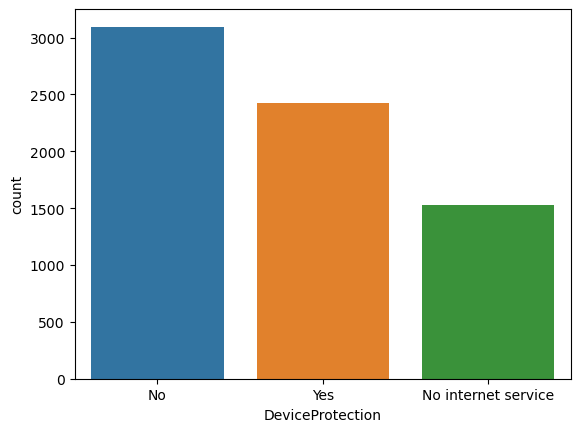

In [48]:
#visualise how many customer have DeviceProtection
print(df['DeviceProtection'].value_counts())
ax=sns.countplot(x='DeviceProtection',data=df)
plt.show()

# obsr
we can see that the customer who do not have internet access they dont need any device protection


TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64


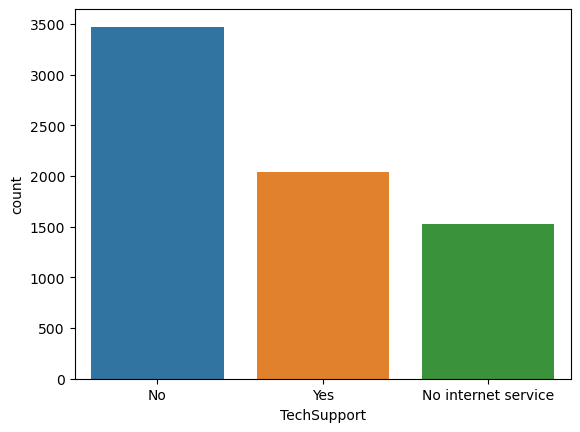

In [49]:
#visualise how many customer have TechSupport
print(df['TechSupport'].value_counts())
ax=sns.countplot(x='TechSupport',data=df)
plt.show()

# obsr
The customer  who do not need any technical support are high in counts compare to the customer who need technicalSupport
for no internetservice they do not need

StreamingTV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64


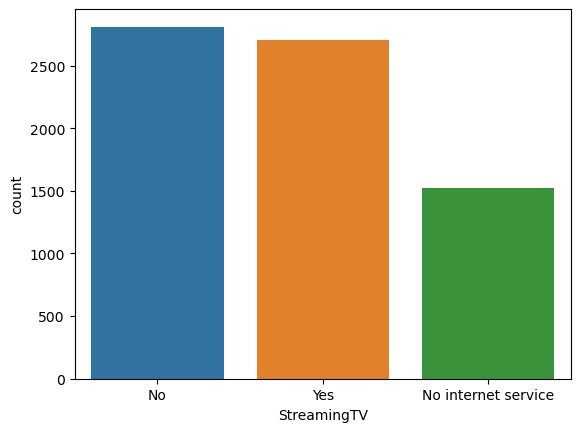

In [50]:
#visualise how many customer have StreamingTV
print(df['StreamingTV'].value_counts())
ax=sns.countplot(x='StreamingTV',data=df)
plt.show()

# obsr
The customer who do not use StreamingTV are little bit high in numbers than the customer who do use StreamingTV 
and the customer who do not have own internet  they do not have this service much

StreamingMovies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64


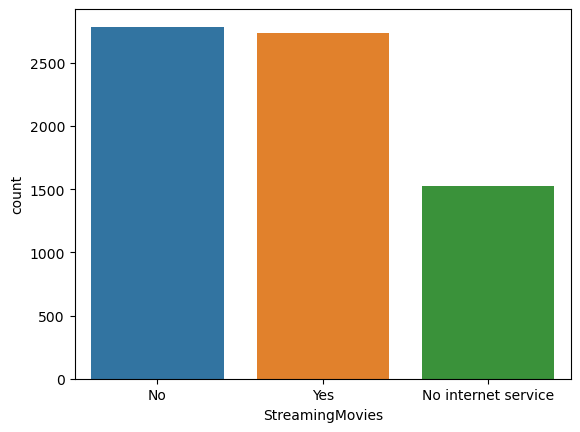

In [51]:
#visualise how many customer have StreamingMovies
print(df['StreamingMovies'].value_counts())
ax=sns.countplot(x='StreamingMovies',data=df)
plt.show()

# obsr
The customer who do not have StreamingMovies are  high in counts followed by  customer who have StreamingMovies services
and the customer who do not have own internet service  they  have less StreamingMovies service compare to others.

PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64


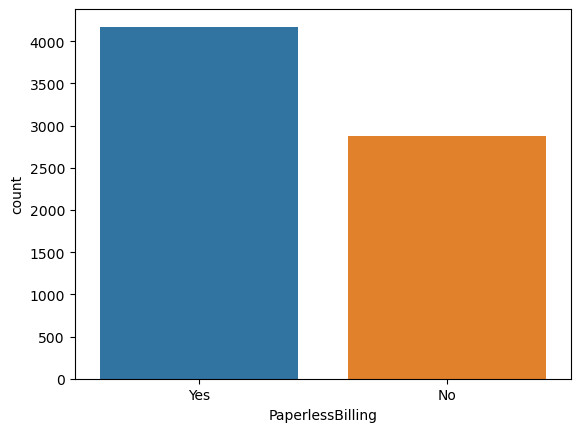

In [53]:
#visualise how many customer have PaperlessBilling
print(df['PaperlessBilling'].value_counts())
ax=sns.countplot(x='PaperlessBilling',data=df)
plt.show()

# obsr
Most of the customer prefer paperbilling and average no. of customer who do not prefer paperless billing  they may like to recieve paper billing

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64


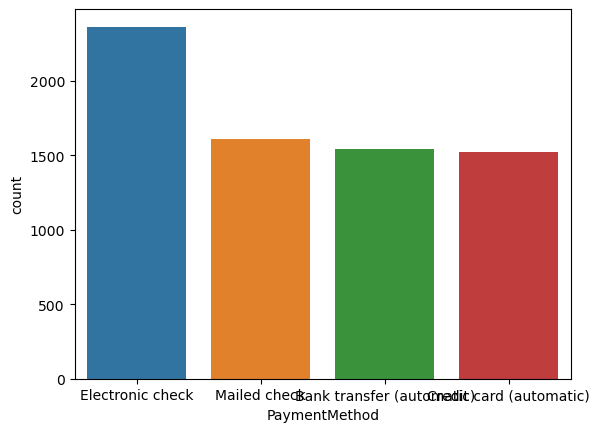

In [54]:
#visualise how many customer have PaymentMethod
print(df['PaymentMethod'].value_counts())
ax=sns.countplot(x='PaymentMethod',data=df)
plt.show()

# obser
Most of the customer prefer electronic check payment method. and the customer who prefer mail check bank transfer & credit card have average in count

tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64


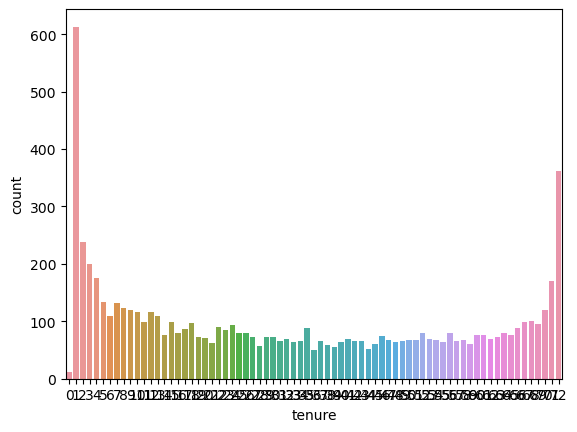

In [55]:
#visualise how many customer have tenure
print(df['tenure'].value_counts())
ax=sns.countplot(x='tenure',data=df)
plt.show()
#here many vlues couns thats why we can not use countplot

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64


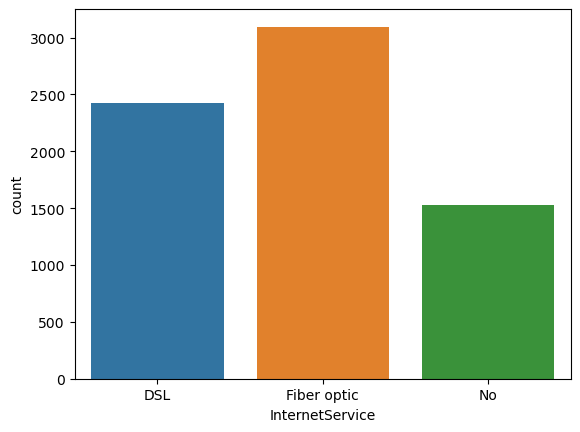

In [56]:
#visualise how many customer have InternetService
print(df['InternetService'].value_counts())
ax=sns.countplot(x='InternetService',data=df)
plt.show()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64


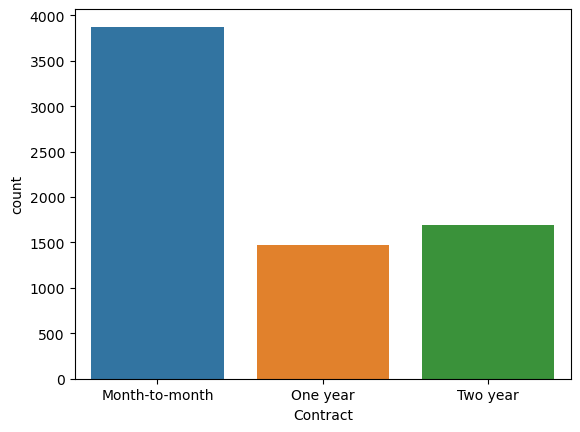

In [57]:
#visualise how many customer have Contract
print(df['Contract'].value_counts())
ax=sns.countplot(x='Contract',data=df)
plt.show()

MonthlyCharges
20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
23.65      1
114.70     1
43.65      1
87.80      1
78.70      1
Name: count, Length: 1585, dtype: int64


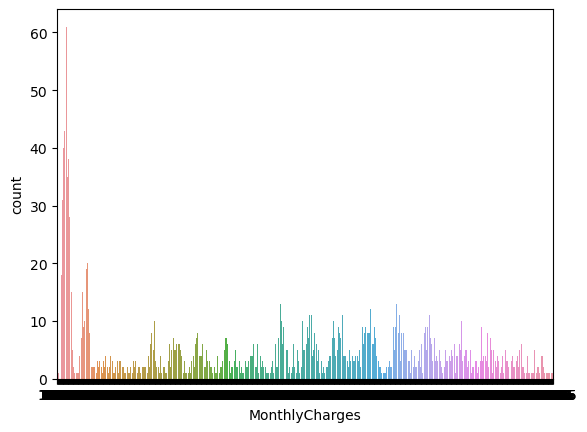

In [58]:
#visualise how many customer have MonthlyCharges
print(df['MonthlyCharges'].value_counts())
ax=sns.countplot(x='MonthlyCharges',data=df)
plt.show()
#we can not use this plot because here uniqvalues more values

TotalCharges
2283.300441    11
20.200000      11
19.750000       9
20.050000       8
19.900000       8
               ..
6849.400000     1
692.350000      1
130.150000      1
3211.900000     1
6844.500000     1
Name: count, Length: 6531, dtype: int64


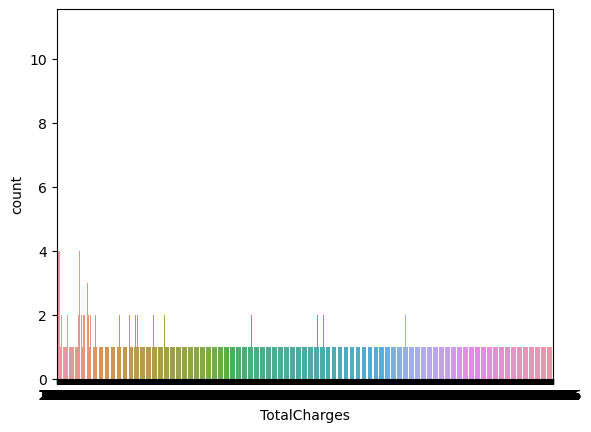

In [59]:
#visualise how many customer have TotalCharges
print(df['TotalCharges'].value_counts())
ax=sns.countplot(x='TotalCharges',data=df)
plt.show()
#we can not use this plot because here uniqvalues more values

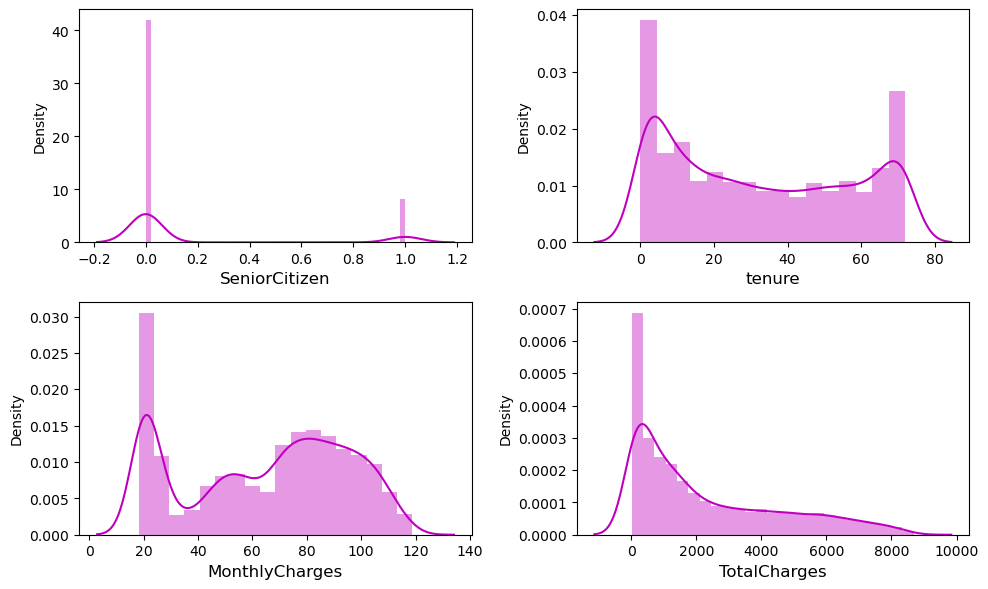

In [60]:
# lets check haw the data hasbeen distributed in remaining columns
plt.figure(figsize=(10,6),facecolor="white")
plotnumber=1
for col in numerical_col:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.distplot(df[col],color="m")
        plt.xlabel(col,fontsize=12)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber +=1
plt.tight_layout()

# obsr
From the above distribution plot we can noticed that the data almost look normal in all the columns except SeniorCitizen and the data in the column totalCharges is skewed to the right ,other 2 columns Tenure  & MonthlyCharges  do not have skewnes.

# Bivariate Analysis

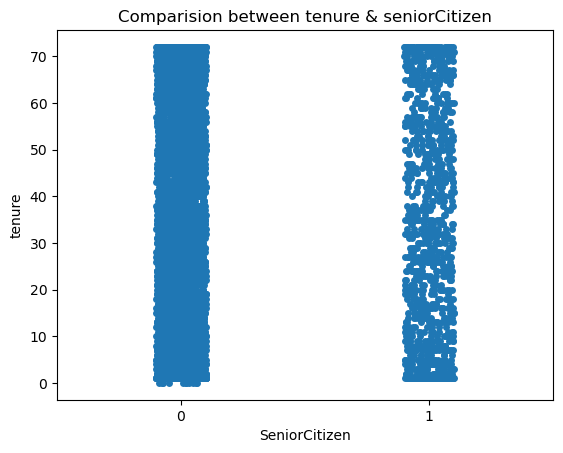

In [61]:
#comparing tenure & seniorcitizen
plt.title("Comparision between tenure & seniorCitizen")
sns.stripplot(x="SeniorCitizen",y="tenure",data=df)
plt.show()

# obsr
#here 0 is SeniorCitizen 1 is tenure here density deffrences shown

There is no Significant between the features ,here bothy the features are in equal lengths

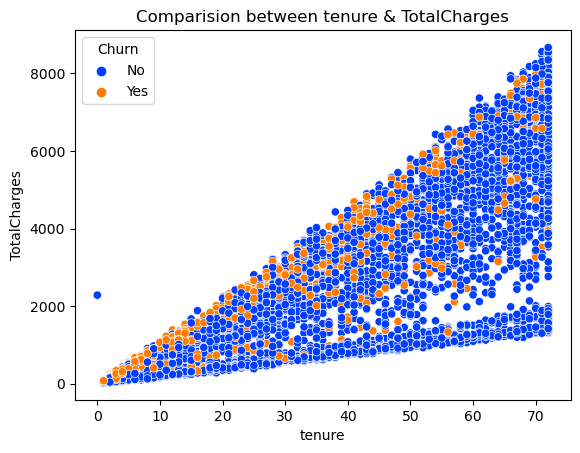

In [62]:
#comparing tenure & TotalCharges
plt.title("Comparision between tenure & TotalCharges")
sns.scatterplot(x="tenure",y="TotalCharges",data=df,hue='Churn',palette='bright')
plt.show()
#here we find out relationship between totalCharges and tenure on the basis of third column churn rate

# obsr
Here we can noticed The strong linear relation between the features 
as the tenurer increase ,totalcharges also increase rapidly,if the customer have low tenure service then there is high chance of churn

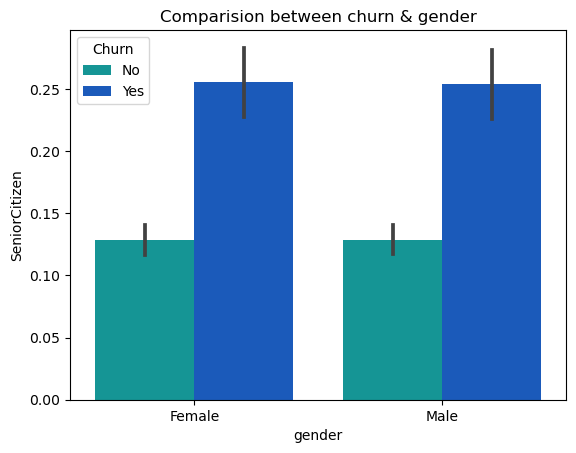

In [63]:
#comparing gender & SeniorCitizen on the basis of churn
plt.title("Comparision between churn & gender")
sns.barplot(x="gender",y="SeniorCitizen",data=df,hue='Churn',palette='winter_r')
plt.show()

# obsr
There is no significant diffrence between the columns. the customer churn remain unaffected in gender and seniorcitizens case

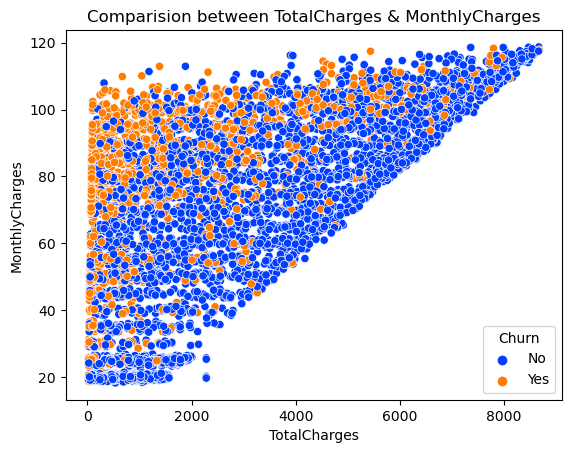

In [64]:
#comparing MonthlyCharges & TotalCharges on the basis of churn
plt.title("Comparision between TotalCharges & MonthlyCharges")
sns.scatterplot(x="TotalCharges",y="MonthlyCharges",data=df,hue='Churn',palette='bright')
plt.show()

# obser
There is a Linear Relationship between the features ,the column with high monthlycharges  have high tendency to stope the service  since they have high totalCharges .
also if the customer is ready to contibute with the monthlycharges then there is an increament in the totalcharges


here we can say strong relationship if we increase totalcharges  then monthlycharges also increase 
when the monthlycolumn is high at that time churn rate is also high

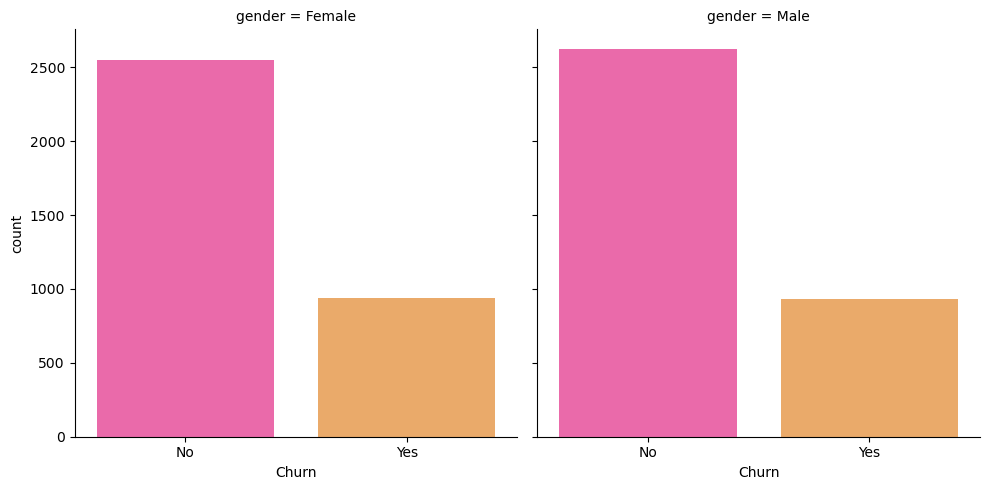

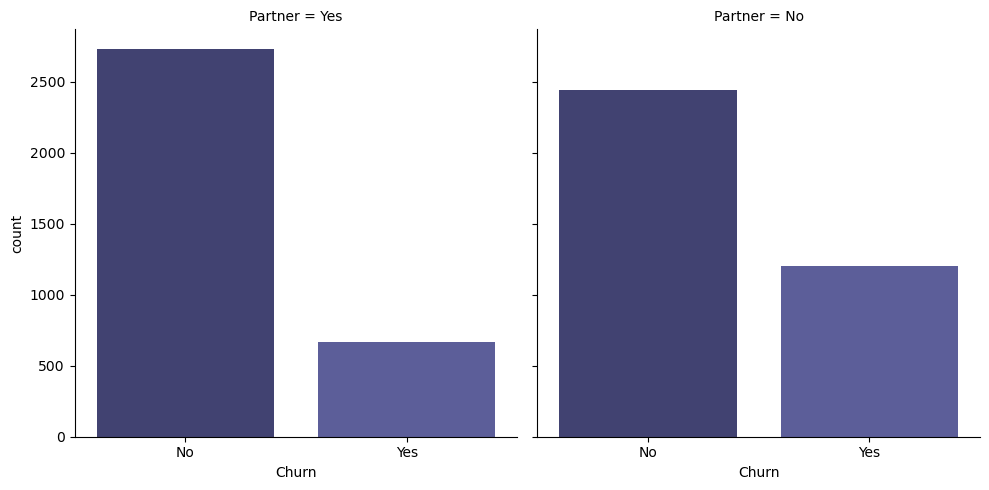

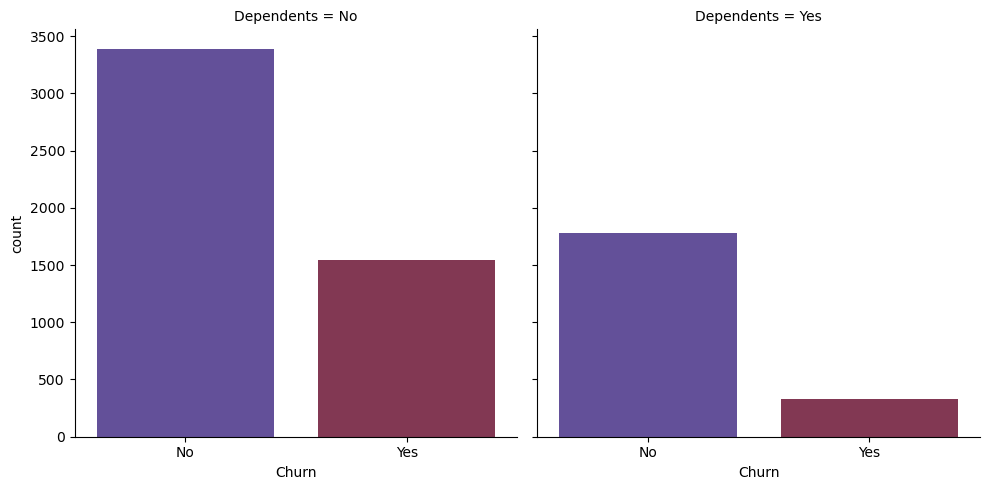

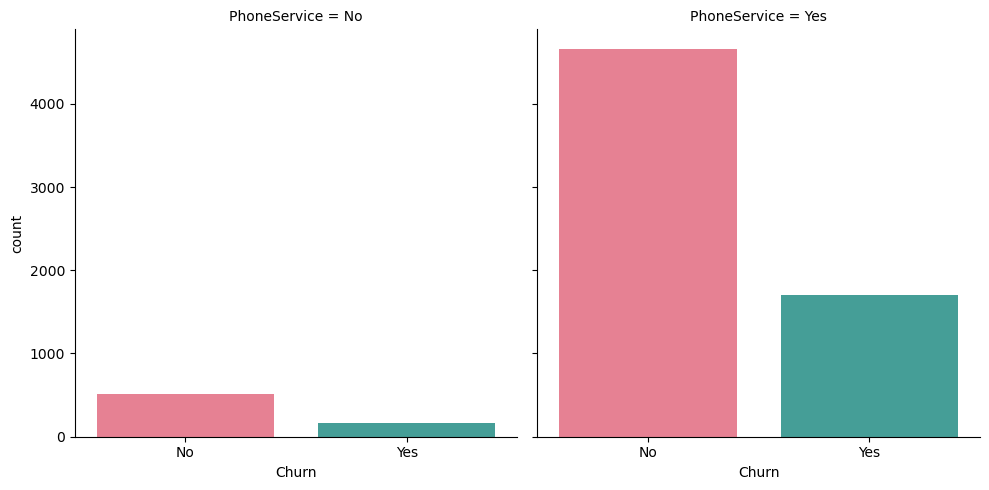

In [65]:
# Checking churn level and gender
sns.catplot(x='Churn', col='gender', data=df, kind='count', palette='spring')

# Checking churn level and partner
sns.catplot(x='Churn', col='Partner', data=df, kind='count', palette='tab20b')

# Checking churn level and Dependents
sns.catplot(x='Churn', col='Dependents', data=df, kind='count', palette='twilight')

# Checking churn level and PhoneService
sns.catplot(x='Churn', col='PhoneService', data=df, kind='count', palette='husl')

plt.show()

# obsr
1. in the first plot we can see there is no significant differences in the gender both the gender have equal churn level.
2. in the second plot we can see customer without partner have high churn rate compared to the customer with partner
3. in the third plot The customer who do not have any dependency have high churn rate compared to the customer who have dependents 
4. in the last  plot we can notice the customer who have phone service have high tendency of getting churned.


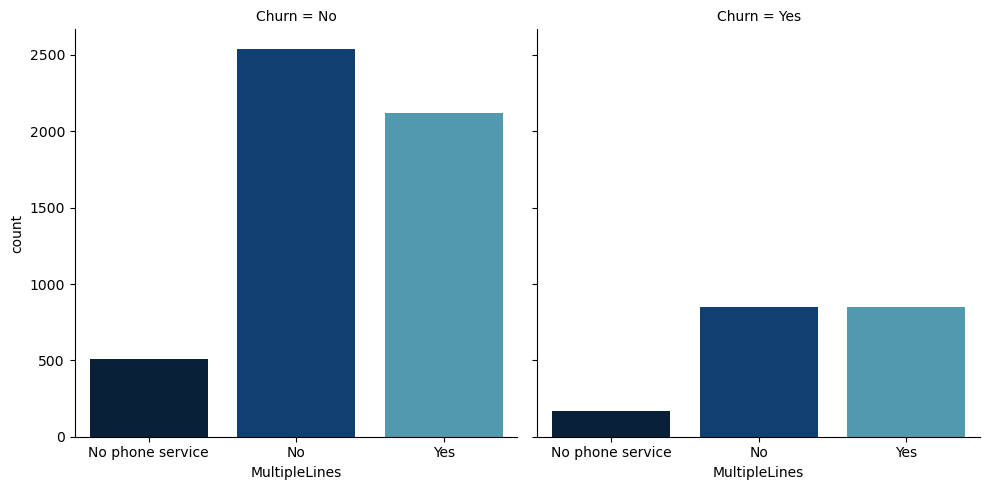

In [66]:
# Checking churn level and MultipleLines
sns.catplot(x='MultipleLines', col='Churn', data=df, kind='count', palette='ocean')
plt.show()

# obsr
The customer who have Phoneservice from single line have high churn rate compared to the customer having phone service from MultipleLines , also there are very less number of customers who do not have Phoneservices

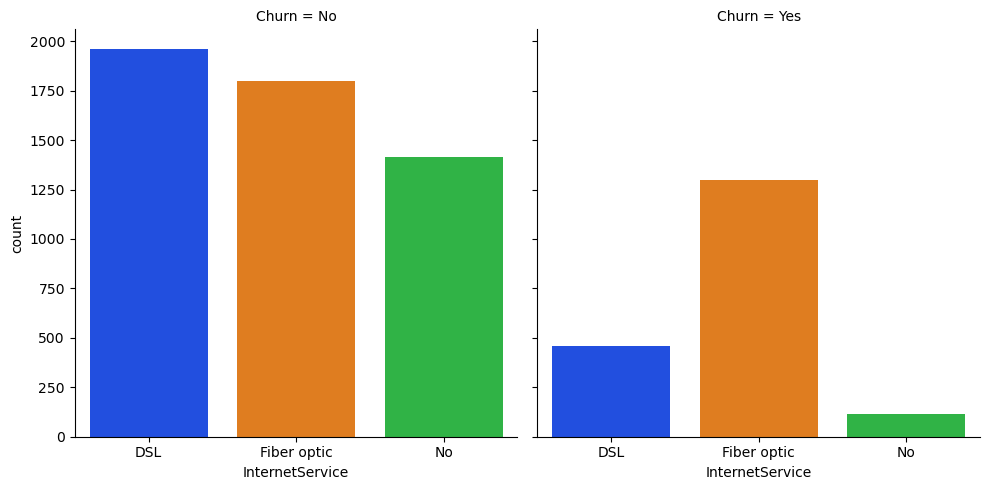

In [68]:
# Checking churn level and InternetService 
sns.catplot(x='InternetService', col='Churn', data=df, kind='count', palette='bright')
plt.show()

# obsr
The ratio of churn is High when the customer prefer the fiber optic internet services compare to others servicess, may be  this type of service is bad  and need to be focused on. And the customer who  have own DSL service they have very less churn rate

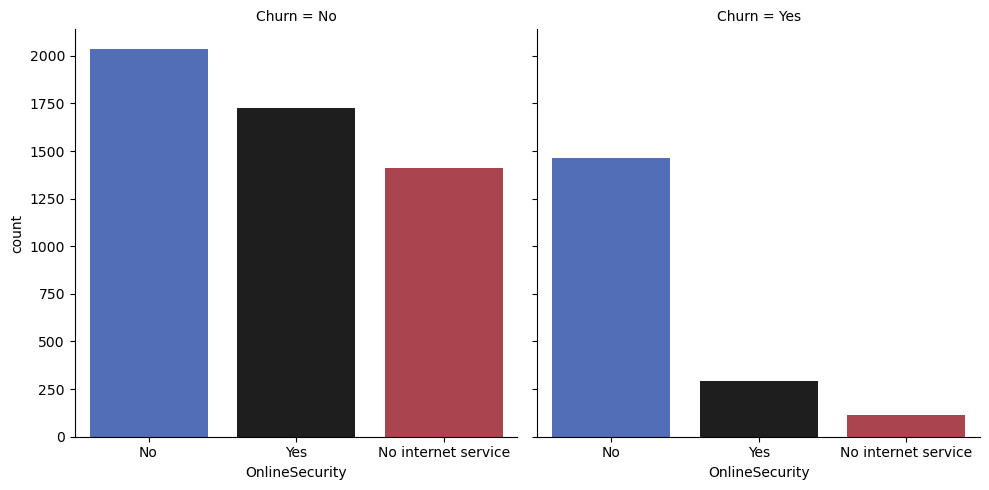

In [69]:
# Checking churn level and OnlineSecurity
sns.catplot(x='OnlineSecurity', col='Churn', data=df, kind='count', palette='icefire')
plt.show()

# obsr
The customer who have no internet service have very less churn rate, and customer who do not have Online security service of high tendency of getting churned.

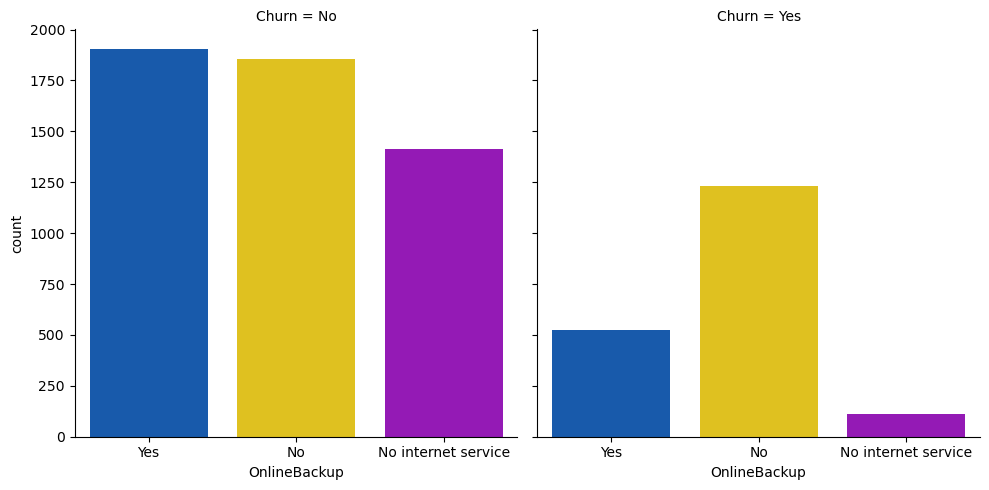

In [70]:
# Checking churn level and OnlineBackup
sns.catplot(x='OnlineBackup', col='Churn', data=df, kind='count', palette='prism')
plt.show()

# obsr
It is also same as in the case of online security .it is obvious that the customer who do not have internet service they do not need any online backup ,the customer who do not have online backup service they have high churn rate.

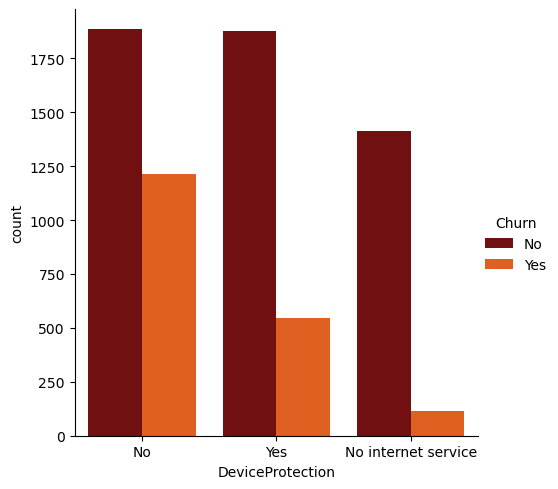

In [71]:
# Checking churn level and DeviceProtection
sns.catplot(x='DeviceProtection',hue='Churn', data=df, kind='count', palette='gist_heat')
plt.show()

# obsr
The customer who do not own any device protection have very high churn rate compare to others.

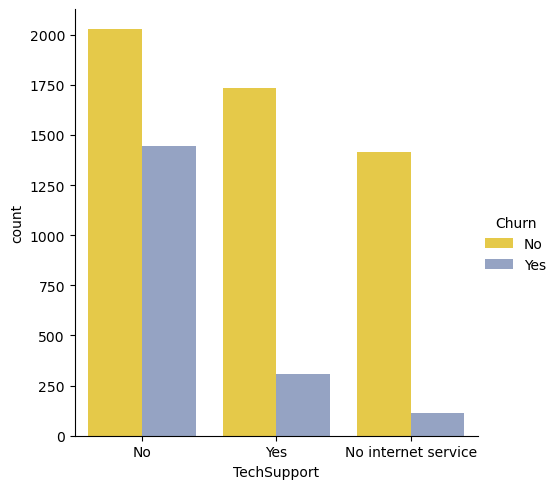

In [72]:
# Checking churn level and TechSupport
sns.catplot(x='TechSupport',hue='Churn', data=df, kind='count', palette='Set2_r')
plt.show()

# We can obser by catplot both way  Or

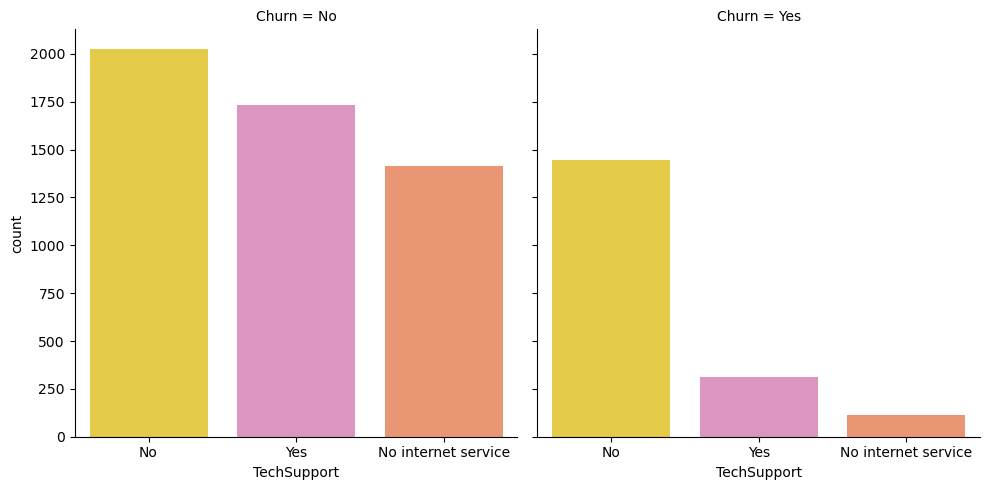

In [73]:
# Checking churn level and TechSupport
sns.catplot(x='TechSupport',col='Churn', data=df, kind='count', palette='Set2_r')
plt.show()

# obser
Here we can clearly see the customer who have not any techsupport they have high churn ratio.

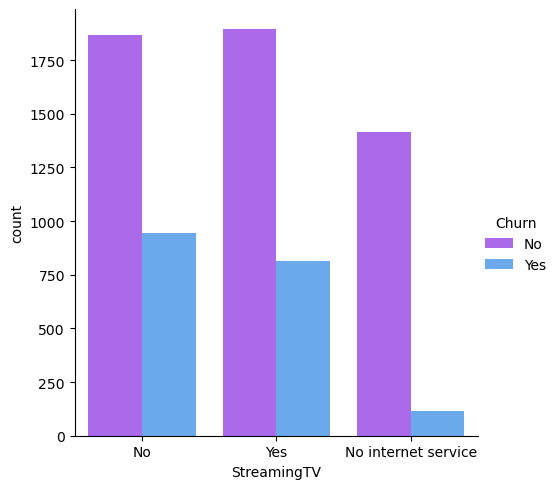

In [74]:
# Checking churn level and StreamingTV
sns.catplot(x='StreamingTV',hue='Churn', data=df, kind='count', palette='cool_r')
plt.show()

# obser
The churn rate is nearly same if the customer own steamingTV or not

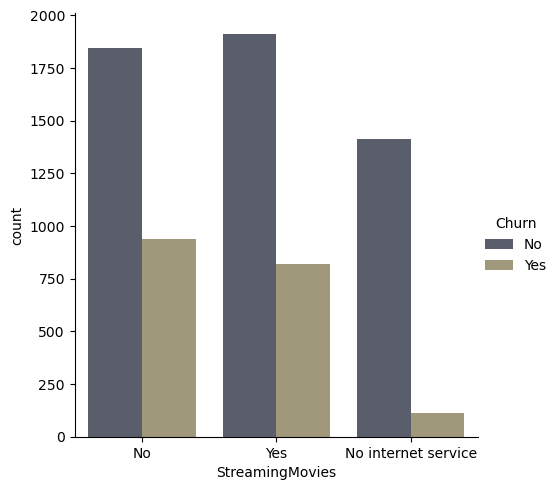

In [75]:
# Checking churn level and StreamingMovies
sns.catplot(x='StreamingMovies',hue='Churn', data=df, kind='count', palette='cividis')
plt.show()

# obsr
The customer who are existing in the company they do not own steamingMovies in their device, and the churnrate is low when the customer do not have InternetService

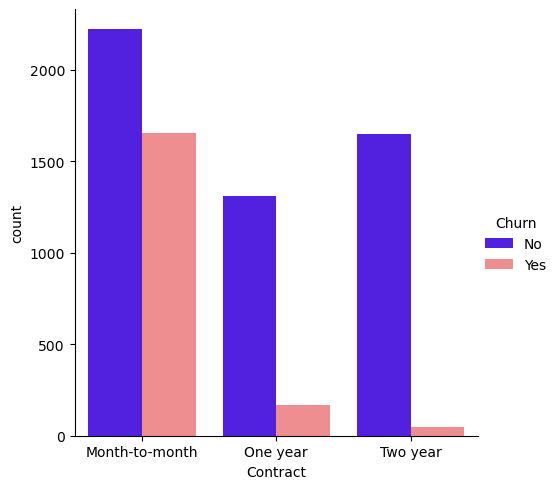

In [76]:
# Checking churn level and Contract
sns.catplot(x='Contract',hue='Churn', data=df, kind='count', palette='gnuplot2')
plt.show()

# obsr
The customer who have churned are mostly having month to month contract

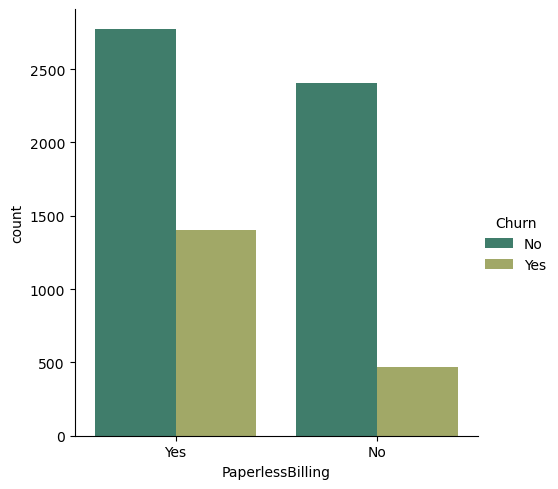

In [77]:
# Checking churn level and PaperlessBilling
sns.catplot(x='PaperlessBilling',hue='Churn', data=df, kind='count', palette='gist_earth')
plt.show()

# obsr
The customer who prefer paperlessbilling they have high churned rate

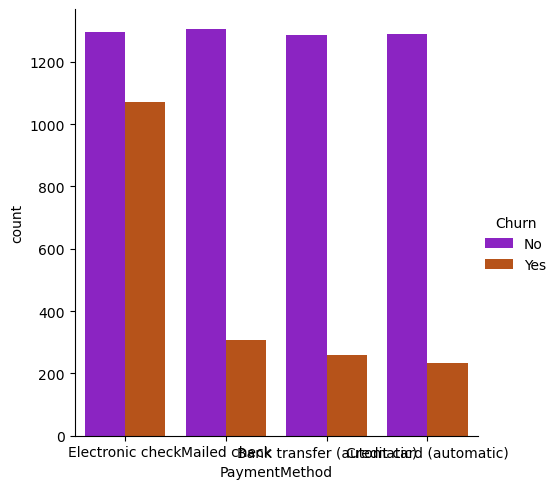

In [81]:
# Checking churn level and PaymentMethod
sns.catplot(x='PaymentMethod',hue='Churn', data=df, kind='count', palette='gnuplot')
plt.show()

# obsr
The customer who prefer electronic check have high churn rate also the customer who exist in the company uses equal payment method

# Multivariate Analysis

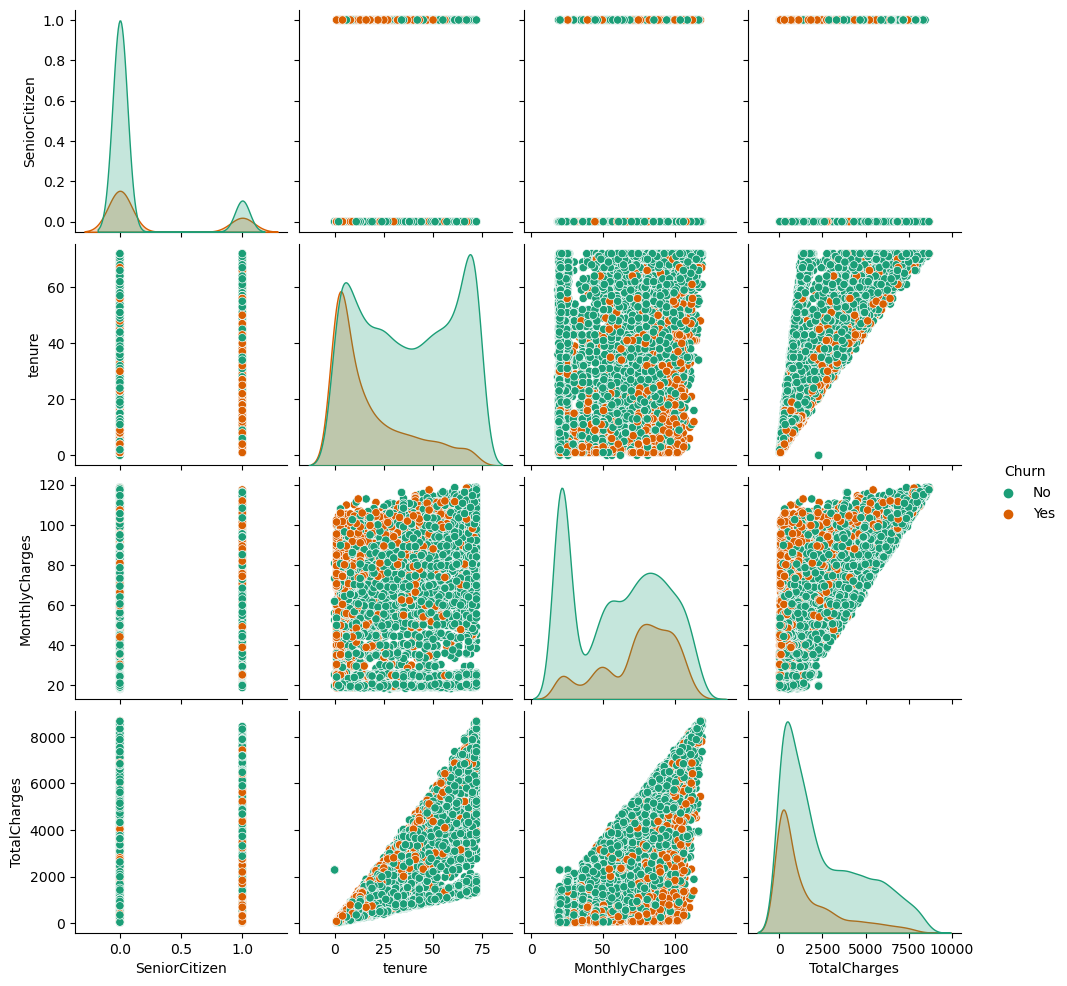

In [82]:
sns.pairplot(df,hue="Churn",palette="Dark2")
plt.show()

# Onservation of pair plot
1. The pairplot gives the pairwise relation between the features on the basis of the target churn on the diagonal we can notice the distribution plot
2. The feature tenure and total charges,MonthlyCharges and totalCharges have strong linear relationship with Each other
3. there are no outliers in any of the columns but lets create plot box to identified the outliers

# checking for Outliers

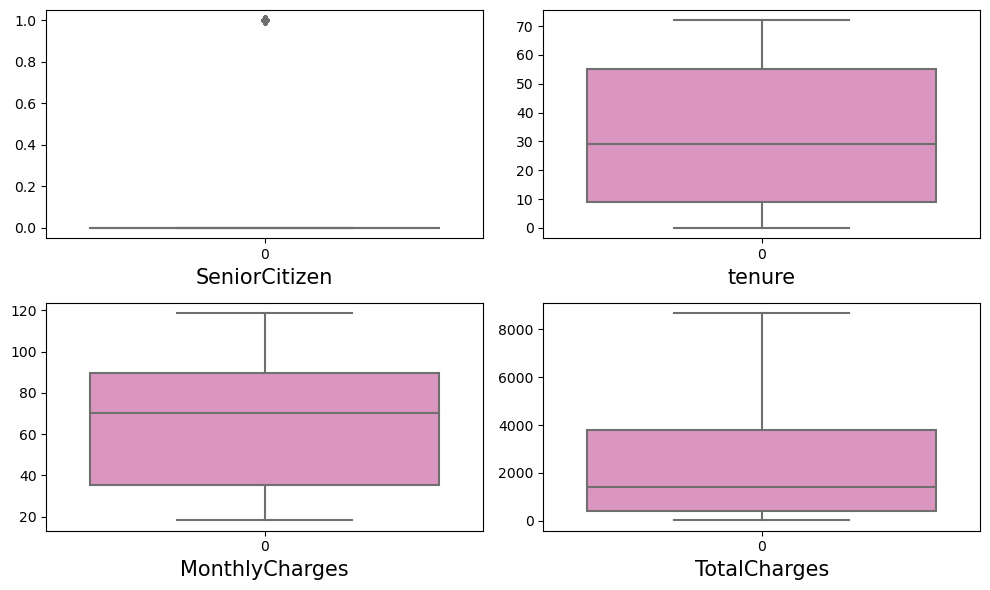

In [86]:
#lets check the outliers by plotting the boxplot
plt.figure(figsize=(10,6),facecolor="white")
plotnumber=1
for col in numerical_col:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(df[col],palette="Set2_r")
        plt.xlabel(col,fontsize=15)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()
    

# observation
The column senior citizen has outliers but it contain categorical data so no neeed to remove outliers , apart from this none of the column have no outliers
-> in senior citizen column has numerical data or discreat data but its consider as a categorical because here only 2 uniq values 0 and 1 thats by this consider as categorical data

# Checking For skewness

In [88]:
#Encoding categorical columns using OrdinalEncoders
#Encoding method is ussed to convert the data formate from categorical into numerical because Ml does not work on categorical columns 
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df.columns:
    if df[i].dtype =='object':
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85,0.0
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0.0
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1.0
3,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75,0.0
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,1990.50,0.0
7039,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,7362.90,0.0
7040,0.0,0,1.0,1.0,11,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,346.45,0.0
7041,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,306.60,1.0


In [89]:
#now check skewnes
df.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.962394
Churn               1.063031
dtype: float64

# Observation of skewness
The columns SeniorCitizen and TotalCharges have skewness in the data. since Seniorcitizen is categorical no need to remove skewness, since totalCharges is continues in nature, lets use cuberoot method to remove this skewness

# we created observation on the basis of these points .....

-> if skewness value in the range of -ve 0.5 to +ve 0.5 thats is consider as a acceptable skewness, if the vlue is 0 it mean there is no skewness , data is normally distributted
-> id the value greater than 0.5 it mean skewness is there . so we  use a different transform method cuberoob method,squareroot method,log method for remove skewness, then we can transfer data into the normal distribution


# Removing skewness

In [90]:
#removing skewness by using cuberoot method 
df['TotalCharges']=np.cbrt(df['TotalCharges'])

# obsr
we have removed skewness by using cuberoot method


In [91]:
#now again checked 
df.skew()
# we can see here now skewness has removed in totaCharges column

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.011168
Churn               1.063031
dtype: float64

# for confirm there is skewnes or not use distplot


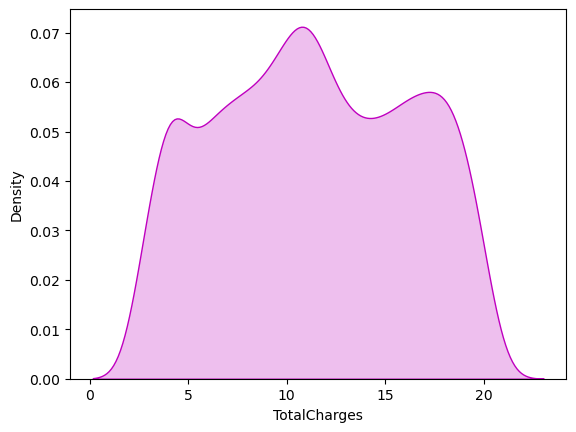

In [95]:
#lets Visualize how data hasbeen distributted in total charges Columns  after removing skewness
sns.distplot(df['TotalCharges'],color='m',kde_kws = {"shade":True},hist=False)
plt.show()

# obsr
this looks almost Normal and skewness is also removed

In [96]:
#again check data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   float64
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   float64
 3   Dependents        7043 non-null   float64
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   float64
 6   MultipleLines     7043 non-null   float64
 7   InternetService   7043 non-null   float64
 8   OnlineSecurity    7043 non-null   float64
 9   OnlineBackup      7043 non-null   float64
 10  DeviceProtection  7043 non-null   float64
 11  TechSupport       7043 non-null   float64
 12  StreamingTV       7043 non-null   float64
 13  StreamingMovies   7043 non-null   float64
 14  Contract          7043 non-null   float64
 15  PaperlessBilling  7043 non-null   float64
 16  PaymentMethod     7043 non-null   float64


# obsr
we have convert the categorical columns into numerical columns using by OrdinalEncoding method


# statistical summary again


In [97]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,11.358079,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,4.896177,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,2.659006,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,7.381699,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,11.188354,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,15.586542,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,20.555116,1.000000


# obsr
After encoding the categorical columns we can see all columns detail here
The counts of all the columns are same, that mean no null values in the data set
This decribe method describe the count, mean,std,,min or IQR and max vlue of all the columns 

# Now check correlation into target variable or independent variable

In [98]:
#checking the correlation between feature and target
cor=df.corr()
cor

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.001975,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.106261,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.343924,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.085055,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.868383,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.087944,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.461995,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.206969,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.246368,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.351488,-0.195525


this gives the correlation between target and dependent or independent variable we can visualize by plotting
->The range of correlation is between -1 to +1 

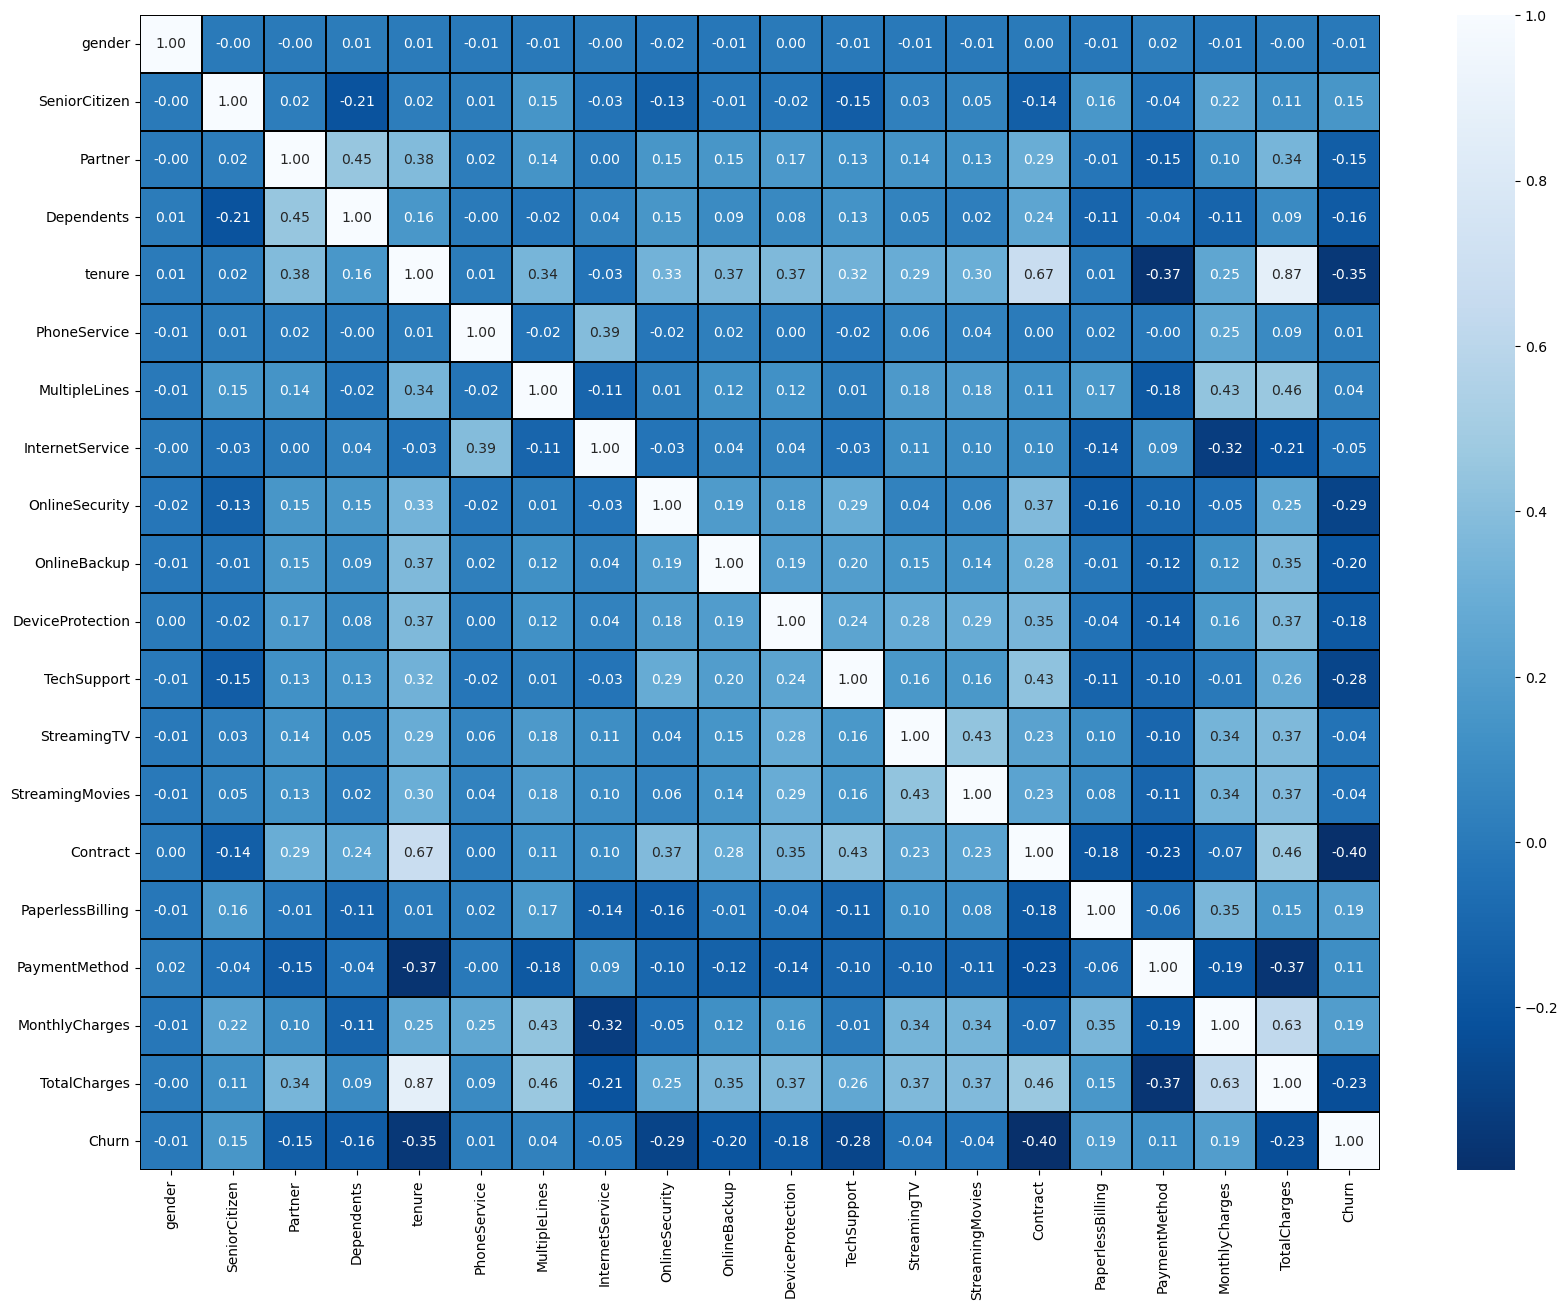

In [102]:
# Visualize the correlation matrix by plotting heatmap
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),linewidths =0.1, fmt=".2f",linecolor="black",annot=True,cmap="Blues_r")
plt.yticks(rotation=0);
plt.show()

# Observation of Correlation
this heatmap  shows the correlation matrix by visualizng the data ,we can observe the relation between feature to feature and feature to label 
this heatmap contain both +ve and -ve correlation , -ve correlation show inversly correlation
1. there is no much possitive correlation between the target and features
2. the columns Monthly Charges , Paperlessbilling ,SeniorCitizen & PaymentMethod  have +ve correlation with the label columns "Churn"
3. The label is negatively correlated with contract,tenure,onlineSecurity, TechSupport, TotalCharges,DeviceProtection, OnlineBackup ,Partner , Dependents.
4. also the column gender has very correlation with the label we can drop it if necessary
5. The column totalcharges and tenure , contract and tenure ,TotalCharges and MonthlyCharges, and many Other columns have high correlation with each other.

In [103]:
# now sort correlation list as high to low
cor["Churn"].sort_values(ascending=False)

Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
PhoneService        0.011942
gender             -0.008612
StreamingTV        -0.036581
StreamingMovies    -0.038492
InternetService    -0.047291
Partner            -0.150448
Dependents         -0.164221
DeviceProtection   -0.178134
OnlineBackup       -0.195525
TotalCharges       -0.233781
TechSupport        -0.282492
OnlineSecurity     -0.289309
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64

# obsr
we can observbe the +ve and -ve correlation features with the target variable churn

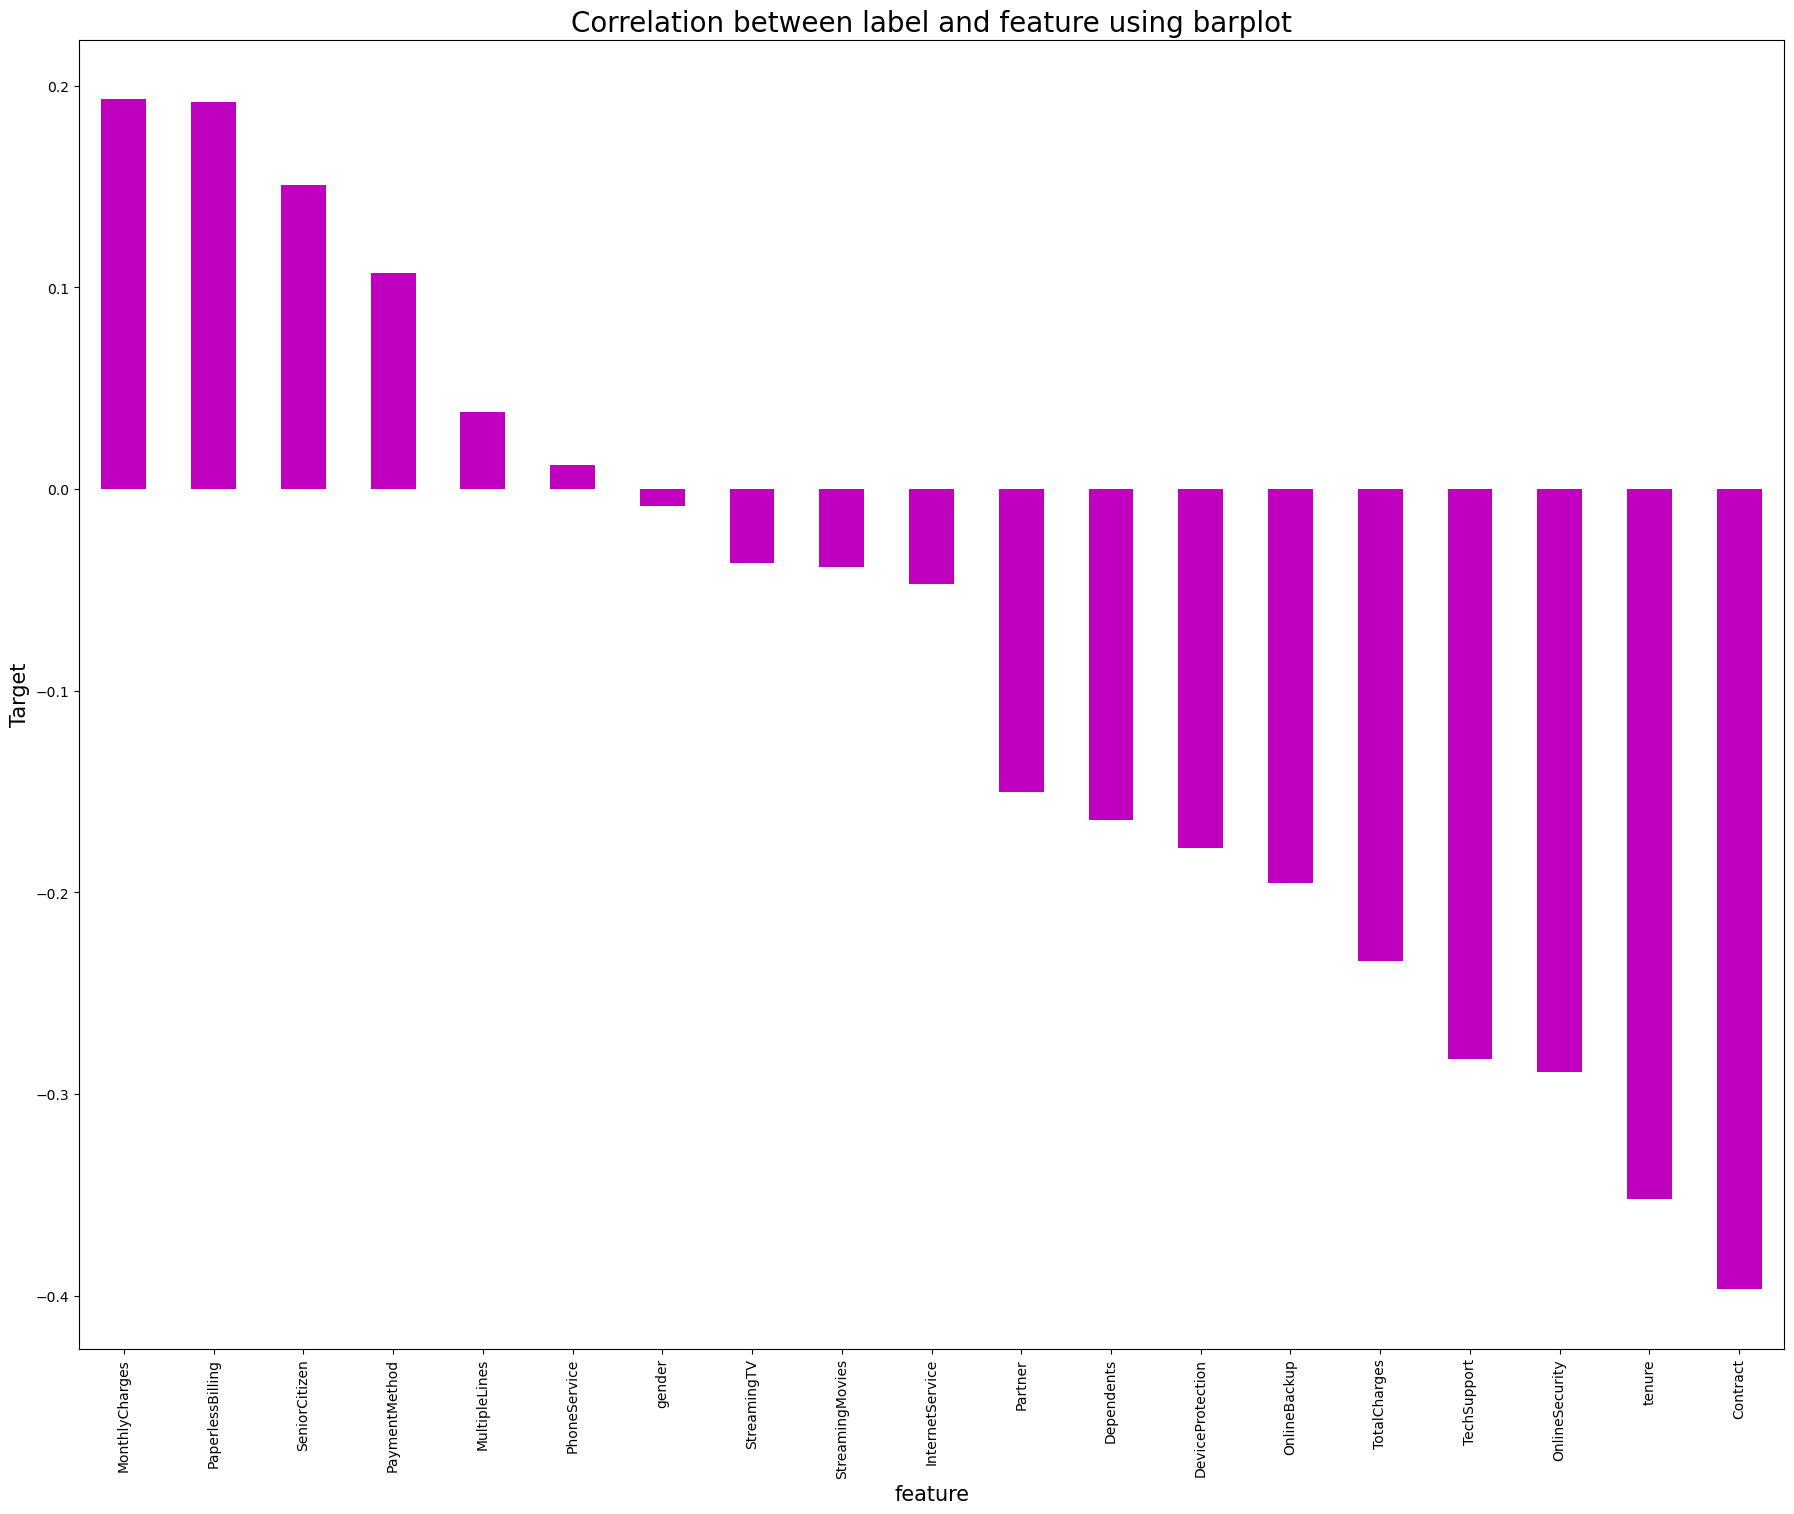

In [107]:
# visualizing the correlation between label and features using barplot
plt.figure(figsize=(22,17))
df.corr()["Churn"].sort_values(ascending=False).drop(["Churn"]).plot(kind ='bar',color='m')
plt.xlabel('feature',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.title("Correlation between label and feature using barplot",fontsize=20)
plt.show()

# obsr
From above the barplot  we can notice the -ve &+ve  correlation between the features and target variable ,here the Feature gender and phonService has very less correlation  with the columns


In [108]:
#separating feature and label
x=df.drop("Churn",axis=1)
y=df["Churn"]

In [111]:
#Feature scaling using Standard_scalarization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-1.009559,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,0.062723,-1.183234,-0.918838,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.160323,-1.686340
1,0.990532,-0.439916,-0.966622,-0.654012,0.066327,0.327438,-0.991588,-1.183234,1.407321,-1.029919,1.245111,-0.925262,-1.113495,-1.121405,0.371271,-1.205113,1.334863,-0.259629,0.205213
2,0.990532,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,-1.183234,1.407321,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,-0.362660,-1.346794
3,0.990532,-0.439916,-0.966622,-0.654012,0.514251,-3.054010,0.062723,-1.183234,1.407321,-1.029919,1.245111,1.396299,-1.113495,-1.121405,0.371271,-1.205113,-1.474052,-0.746535,0.183306
4,-1.009559,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,0.197365,-1.230716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.990532,-0.439916,1.034530,1.529024,-0.340876,0.327438,1.117034,-1.183234,1.407321,-1.029919,1.245111,1.396299,1.146547,1.138411,0.371271,0.829798,1.334863,0.665992,0.249427
7039,-1.009559,-0.439916,1.034530,1.529024,1.613701,0.327438,1.117034,0.172250,-0.918838,1.242550,1.245111,-0.925262,1.146547,1.138411,0.371271,0.829798,-0.537747,1.277533,1.653704
7040,-1.009559,-0.439916,1.034530,1.529024,-0.870241,-3.054010,0.062723,-1.183234,1.407321,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.168632,-0.885384
7041,0.990532,2.273159,1.034530,-0.654012,-1.155283,0.327438,1.117034,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,0.320338,-0.942642


# obsr
we have scaled the data using Standard scalarization method to overcome the issue of biasness

# checking Variance inflation factor (VIF)

In [115]:
# finding VIF in each scaled column i.e x.shape[1] (1/(1-R2))

# Assuming 'x' is your DataFrame of scaled features
# Create a DataFrame to hold the VIF values
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["Feature"] = x.columns
vif["VIF Values"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

# Display the VIF values
vif

,Feature,VIF Values
0,gender,1.001696
1,SeniorCitizen,1.149704
2,Partner,1.462974
3,Dependents,1.383950
4,tenure,12.357252
5,PhoneService,1.622391
6,MultipleLines,1.398354
7,InternetService,1.870013
8,OnlineSecurity,1.256219
9,OnlineBackup,1.192694


# obser
if vif value is 1 it mean that column not correlated with the remaining independent variable
if vif value more than 1 then its highly correlated with other variables .
for vif factor threshold values is 10 if anyvalue grater than 10 it mean multicolinearity is present its problem

-> By checking VIF value we can find the feature causing multicolinearity problem. Here we can find the feature Total charges and tenure have VIF value greater than 10 which mean they have high correlation with others feature. 
we will drop one of the column first, if the same issue exist then we will try to remove the column having high VIF factor.



In [116]:
# dropping totalCharges columns
x.drop("TotalCharges",axis=1,inplace=True)

In [117]:
#again check VIF values to confirm wether the multicolinearity still exist or not
vif = pd.DataFrame()
vif["Feature"] = x.columns
vif["VIF Values"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif

,Feature,VIF Values
0,gender,1.001684
1,SeniorCitizen,1.149639
2,Partner,1.460856
3,Dependents,1.382106
4,tenure,2.754468
5,PhoneService,1.622282
6,MultipleLines,1.391652
7,InternetService,1.825876
8,OnlineSecurity,1.247696
9,OnlineBackup,1.185932


# obsr
so we have solved multicolinearity issue . we can now move ahead for modelbuilding

In [118]:
y.value_counts()
# here we can see data is not blanced, since it is aclassification problem.
# we will blanced the data by using Oversampling method 
#(binary classification has 2 unique values are that is not blance 1 is very high so we can consider this implance )

Churn
0.0    5174
1.0    1869
Name: count, dtype: int64

# Oversampling

In [120]:
#pip install imblearn
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x1,y1=sm.fit_resample(x,y)

In [126]:
#checking value counts of target column
#earlier
print(y.value_counts())
#after smote oversampling
print(y1.value_counts())

Churn
0.0    5174
1.0    1869
Name: count, dtype: int64
Churn
0.0    5174
1.0    5174
Name: count, dtype: int64


# before going to the modeling review what analysis we have done

""""import the libraries 
do non graphical Analysis
graphical Analysis
Univariate Analysis
Bivariate Analysis
Multivariate Analysis

encode the categorical columns
check outliers and remove it if present
check skewness and remove it if present
check multicollinearity
remove multicollinearity if present
apply feature scalling method on numerical features
apply resampling methods to blance the classes (in classification problem)
also apply feature selection method """"


# now data is blanced now we can build machine learning classification model


# Modelling

In [130]:
# find the best random state
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range (1,200):
    x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.30, random_state=i)
    RFR = RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred=RFR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("best accuracy is ",maxAccu,"at random_state",maxRS)

best accuracy is  0.8669887278582931 at random_state 102


#now we will use some random state same devided data where i am getting the maximum accuracy

In [131]:
# create train test split
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.30, random_state=maxRS)

# Classification Algorithm

In [133]:
from sklearn.ensemble import RandomForestClassifier ,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score

# RandomForestClassifier


In [134]:
#checking accuracy for RandomForestClassifier
RCF=RandomForestClassifier()
RCF.fit(x_train,y_train)
predRCF=(RCF.predict(x_test))
print(accuracy_score(y_test,predRCF))
print(confusion_matrix(y_test,predRCF))
print(classification_report(y_test,predRCF))

0.8631239935587761
[[1352  218]
 [ 207 1328]]
              precision    recall  f1-score   support

         0.0       0.87      0.86      0.86      1570
         1.0       0.86      0.87      0.86      1535

    accuracy                           0.86      3105
   macro avg       0.86      0.86      0.86      3105
weighted avg       0.86      0.86      0.86      3105



# obsr
The accuracy for RFC model is 86.82%

# LogisticRegression

In [135]:
#checking accuracy for LogisticRegression
LR=LogisticRegression()
LR.fit(x_train,y_train)
predLR=(LR.predict(x_test))
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.7887278582930757
[[1182  388]
 [ 268 1267]]
              precision    recall  f1-score   support

         0.0       0.82      0.75      0.78      1570
         1.0       0.77      0.83      0.79      1535

    accuracy                           0.79      3105
   macro avg       0.79      0.79      0.79      3105
weighted avg       0.79      0.79      0.79      3105



# obsr
The accuracy score for LogisticRegression model is 78.87%

# Support Vector Machine Classifier

In [137]:
#checking accuracy for Support Vector Machine Classifier
svc=SVC()
svc.fit(x_train,y_train)
predsvc=(svc.predict(x_test))
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.8173913043478261
[[1233  337]
 [ 230 1305]]
              precision    recall  f1-score   support

         0.0       0.84      0.79      0.81      1570
         1.0       0.79      0.85      0.82      1535

    accuracy                           0.82      3105
   macro avg       0.82      0.82      0.82      3105
weighted avg       0.82      0.82      0.82      3105



# obsr
The accuracy score for Support Vector Machine Classifier model is 81.73%

# GradientBoostingClassifier


In [139]:
#checking accuracy for GradientBoostingClassifier
GB=GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB=(GB.predict(x_test))
print(accuracy_score(y_test,predGB))
print(confusion_matrix(y_test,predGB))
print(classification_report(y_test,predGB))

0.8576489533011272
[[1306  264]
 [ 178 1357]]
              precision    recall  f1-score   support

         0.0       0.88      0.83      0.86      1570
         1.0       0.84      0.88      0.86      1535

    accuracy                           0.86      3105
   macro avg       0.86      0.86      0.86      3105
weighted avg       0.86      0.86      0.86      3105



# obsr
The accuracy score for GradientBoostingClassifier model is 85.73%

# AdaBosstClassifier


In [141]:
#checking accuracy for AdaBoostClassifier
ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)
predABC=(ABC.predict(x_test))
print(accuracy_score(y_test,predABC))
print(confusion_matrix(y_test,predABC))
print(classification_report(y_test,predABC))

0.8331723027375201
[[1251  319]
 [ 199 1336]]
              precision    recall  f1-score   support

         0.0       0.86      0.80      0.83      1570
         1.0       0.81      0.87      0.84      1535

    accuracy                           0.83      3105
   macro avg       0.84      0.83      0.83      3105
weighted avg       0.84      0.83      0.83      3105



# obsr
The accuracy score for AdaBosstClassifier model is 83.73%

# BaggingClassifier

In [142]:
#checking accuracy for BaggingClassifier
BC=BaggingClassifier()
BC.fit(x_train,y_train)
predBC=(BC.predict(x_test))
print(accuracy_score(y_test,predBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))

0.8328502415458937
[[1339  231]
 [ 288 1247]]
              precision    recall  f1-score   support

         0.0       0.82      0.85      0.84      1570
         1.0       0.84      0.81      0.83      1535

    accuracy                           0.83      3105
   macro avg       0.83      0.83      0.83      3105
weighted avg       0.83      0.83      0.83      3105



# obsr
The accuracy score for BaggingClassifier model is 83.28%

# ExtraTreesClassifier

In [144]:
#checking accuracy for ExtraTreesClassifier
ET=ExtraTreesClassifier()
ET.fit(x_train,y_train)
predET=(ET.predict(x_test))
print(accuracy_score(y_test,predET))
print(confusion_matrix(y_test,predET))
print(classification_report(y_test,predET))

0.8682769726247987
[[1346  224]
 [ 185 1350]]
              precision    recall  f1-score   support

         0.0       0.88      0.86      0.87      1570
         1.0       0.86      0.88      0.87      1535

    accuracy                           0.87      3105
   macro avg       0.87      0.87      0.87      3105
weighted avg       0.87      0.87      0.87      3105



# obsr
The accuracy score for ExtraTreesClassifier model is 86.82%

#now question is that  how can we conclude whatever the performance we are getting is accurate or not..
so we have find accuracy by modeling
so we can findout or calculate by overfitting method ( cross validation method)


# Cross validation Method

In [150]:
from sklearn.model_selection import cross_val_score
#checking cross_val_score  from randomForestClassifier
score=cross_val_score(RCF,x1,y1)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is ",accuracy_score(y_test,predRCF)-score.mean())

[0.76763285 0.78502415 0.89275362 0.89656839 0.9101015 ]
0.8504161033709019
Difference between accuracy score and cross validation score is  0.012707890187874216


In [151]:
#checking cross_val_score  from LogisticRegression
score=cross_val_score(LR,x1,y1)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is ",accuracy_score(y_test,predLR)-score.mean())

[0.76908213 0.75555556 0.7821256  0.78540358 0.78830353]
0.7760940779811479
Difference between accuracy score and cross validation score is  0.012633780311927745


In [153]:
#checking cross_val_score  from GradientBoostingClassifier
score=cross_val_score(GB,x1,y1)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is ",accuracy_score(y_test,predGB)-score.mean())

[0.75507246 0.77874396 0.87101449 0.87336878 0.88593523]
0.8328269858948406
Difference between accuracy score and cross validation score is  0.024821967406286616


In [154]:
#checking cross_val_score  from Support Vector Machine Classifier
score=cross_val_score(svc,x1,y1)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is ",accuracy_score(y_test,predsvc)-score.mean())

[0.77922705 0.77342995 0.82173913 0.81875302 0.8298695 ]
0.8046037316447302
Difference between accuracy score and cross validation score is  0.01278757270309594


In [155]:
score=cross_val_score(svc,x,y)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is ",accuracy_score(y_test,predsvc)-score.mean())

[0.79914833 0.80411639 0.78424414 0.79971591 0.80113636]
0.7976722288534744
Difference between accuracy score and cross validation score is  0.0197190754943517


In [157]:
#checking cross_val_score  from AdaBosstClassifier
score=cross_val_score(ABC,x,y)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is ",accuracy_score(y_test,predABC)-score.mean())

[0.81121363 0.80482612 0.79914833 0.80539773 0.80752841]
0.8056228426027486
Difference between accuracy score and cross validation score is  0.027549460134771442


In [160]:
#checking cross_val_score  from BaggingClassifier
score=cross_val_score(BC,x,y)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is ",accuracy_score(y_test,predBC)-score.mean())

[0.77856636 0.77004968 0.75585522 0.76633523 0.78835227]
0.7718317512420155
Difference between accuracy score and cross validation score is  0.06101849030387818


In [161]:
#checking cross_val_score  from ExtraTreesClassifier
score=cross_val_score(ET,x,y)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is ",accuracy_score(y_test,predET)-score.mean())

[0.78779276 0.77217885 0.75159688 0.76491477 0.78053977]
0.7714046067488225
Difference between accuracy score and cross validation score is  0.09687236587597625


# observation
ExtratreeClassifier is our best model  as the difference between accuracy score and the cross validation score is least


# ExtraTreeClassifier is our best model

# Hyper perameter tuning
#again it is the cross validation method 

In [163]:
#ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
parameter= {'criterion':['gini','entropy'],
            'random_state':[10,50,1000],
            'max_depth':[0,10,20],
            'n_jobs':[-2,-1,1],
            'n_estimators':[50,100,200,300]}

In [165]:
GCV=GridSearchCV(ExtraTreesClassifier(),parameter,cv=5)

In [166]:
GCV.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [167]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'n_estimators': 300,
 'n_jobs': -2,
 'random_state': 10}

In [169]:
final_model=ExtraTreesClassifier(criterion='entropy',max_depth=10,n_estimators=100,n_jobs=-2,random_state=50)
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

83.12399355877616


In [170]:
final_model=ExtraTreesClassifier(criterion='gini',max_depth=20,n_estimators=300,n_jobs=-2,random_state=50)
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

86.95652173913044


# Plotting ROC & Compare AUC for all the models ussed

In [175]:
from sklearn import dataset
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import plot_roc_curve

ImportError: cannot import name 'dataset' from 'sklearn' (C:\Users\ww\anaconda3\Lib\site-packages\sklearn\__init__.py)

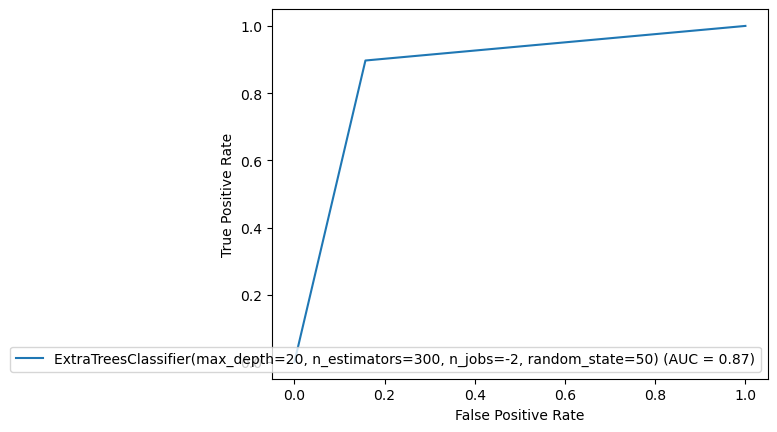

In [176]:
from sklearn import metrics
fpr,tpr,thresholds=metrics.roc_curve(y_test,pred)
roc_auc=metrics.auc(fpr,tpr)
display= metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=final_model)
display.plot()

# obsr
here we have plotted the ROC curve for the final model and the AUC value for the best model is 87%

# Saving the model

In [177]:
#saving the model using pkl
import joblib
joblib.dump(final_model,"Telecom_Customer_Churn_Analysing.pkl")

['Telecom_Customer_Churn_Analysing.pkl']

# Predicting the save model

In [178]:
#lets load the save model and get the prediction
model=joblib.load("Telecom_Customer_Churn_Analysing.pkl")

In [179]:
#prediction
Prediction = model.predict(x_test)
Prediction

array([1., 0., 0., ..., 1., 1., 0.])

In [ ]:
There are the Prediction churn value of the customer

In [180]:
#Again check model giving the correct performance or not
a=np.array(y_test)
df=pd.DataFrame()
df["Prediction"]=Prediction
df["Original"]=a
df

,Prediction,Original
0,1.0,1.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
3100,1.0,1.0
3101,1.0,0.0
3102,1.0,1.0
3103,1.0,1.0


------------------------------------------------Project completed_----------------------------------------------------------